In [2]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI
from datetime import datetime, timedelta, date
from IPython.display import display, HTML
%matplotlib inline

In [3]:
start_day_to_analyze = '2020-02-05'
end_day_to_analyze = '2020-02-06'

In [4]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [5]:
db_conn = create_engine("postgresql://momentum@localhost:5432/tradedb")

In [6]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)
session = requests.session()

In [7]:
query = f'''
SELECT * 
FROM 
trades 
WHERE 
    buy_time >= '{start_day_to_analyze}' and 
    buy_time < '{end_day_to_analyze}' 
ORDER BY symbol, buy_time
'''

In [8]:
trades =  pd.read_sql_query(query, db_conn)

In [9]:
trade_details = {}

for index, row in trades.iterrows():
    symbol = row['symbol']
    buy_time = row['client_buy_time']
    buy_price = row['buy_price']
    sell_time = row['client_sell_time']
    sell_price = row['sell_price']
    buy_indicator = row['buy_indicators']
    sell_indicator = row['sell_indicators']
    qty = row['qty']       
    if symbol not in trade_details:
        trade_details[symbol] = []
    trade_details[symbol].append((buy_time, buy_price, sell_time, sell_price, buy_indicator, sell_indicator, qty))

In [10]:
symbols = trades['symbol'].value_counts()

In [23]:
revenues = []
precentages = []
symbol_name = []
counts = []
for symbol, count in symbols.items():
    revnue = 0
    precentage = 0.0
    
    for trade in trade_details[symbol]:
        delta = trade[6] * (trade[3] - trade[1])
        precentage += 100.0 * delta / (trade[6] * trade[1])
        revnue += delta
        
    revenues.append(revnue)
    precentages.append(precentage)
    counts.append(count)
    symbol_name.append(symbol)
    

d = {
    'symbol': symbol_name,
    'count': counts,
    'revenue': revenues,
    '%': precentages
}
how_was_my_day = pd.DataFrame(data=d)


In [26]:
display(HTML(how_was_my_day.round(2).to_html()))
print(f'TOTAL REVENUE: {pd.Series(revenues).round(2).sum()} $')

,symbol,count,revenue,%
0,YRCW,4,-142.88,-11.81
1,QEP,3,-121.12,-2.70
2,CONN,3,99.00,5.46
3,VVUS,3,53.20,4.39
4,AVXL,3,-167.55,-6.53
5,OBSV,3,-193.30,-3.70
6,GHL,2,-101.29,-2.66
7,CRC,2,-85.02,-2.37
8,SM,2,-44.11,-0.75
9,ATRA,2,13.60,0.28


TOTAL REVENUE: -2123.27 $


In [27]:
minute_history = {}
for symbol, count in symbols.items():
    minute_history[symbol] = api.polygon.historic_agg_v2(
        symbol, 
        1, 
        'minute', 
        _from = start_day_to_analyze, 
        to=end_day_to_analyze, 
        limit=5000).df

YRCW analysis


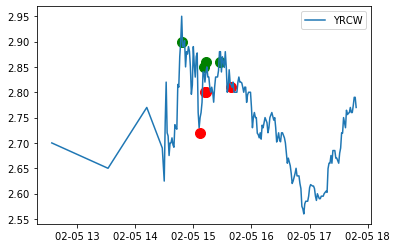

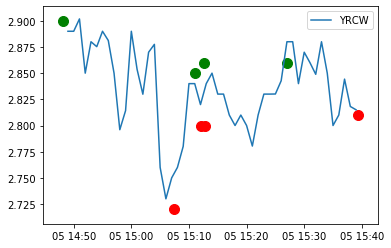

Delta = -0.33999999999999986


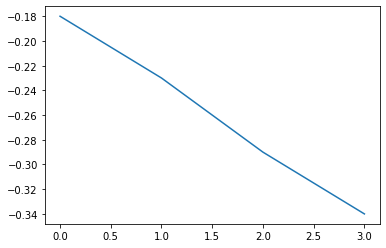

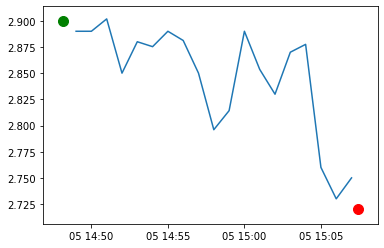

buy time:2020-02-05T14:48:07.511652292Z sell time:2020-02-05T15:07:24.246090249Z
{'rsi': 68.33892486381514, 'macd1': [0.042305808079050156, 0.04176988895678102, 0.047917873815894296, 0.056544153989662505, 0.06545028057606572], 'macd2': [0.01252651366141544, 0.01366595289272654, 0.016104651757051336, 0.019195826279155614, 0.022568880765459376], 'macd_signal': [0.039108499843648434, 0.039640777666274954, 0.041296196896198824, 0.04434578831489156, 0.048566686767126395]}
{'rsi': 40.736384292646356, 'macd': [0.0191459520161934, 0.01886882871157658, 0.012303942646789245, 0.005470213990503403, -0.00044529163764783775], 'too_close': 1, 'macd_signal': [0.026653623461871043, 0.02509666451181215, 0.022538120138807568, 0.019124538909146734, 0.015210572799787818], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.015655864437435656}


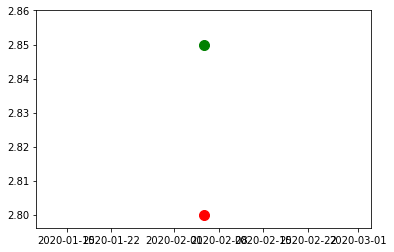

buy time:2020-02-05T15:11:07.950790595Z sell time:2020-02-05T15:12:06.539455273Z
{'rsi': 54.6488226858052, 'macd1': [0.007370093144149159, 0.0026727013408285316, 0.0005653692859097781, 0.003686230276660929, 0.006887061761988278], 'macd2': [0.034768189328374, 0.033372698251487254, 0.0323568982671123, 0.03232859624507478, 0.03241078843312417], 'macd_signal': [0.029736782053248333, 0.024323965910764373, 0.019572246585793453, 0.01639504332396695, 0.014493447011571214]}
{'rsi': 48.07249150215602, 'macd': [-0.0017769409117174284, -0.0029617267433921235, -0.0007347841869909111, 0.0010100383788671508, -0.0002408796007093983], 'too_close': 1, 'macd_signal': [0.012062420706837416, 0.009057591216791509, 0.007099116136035024, 0.00588130058460145, 0.00465686454753928], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004897744148248678}


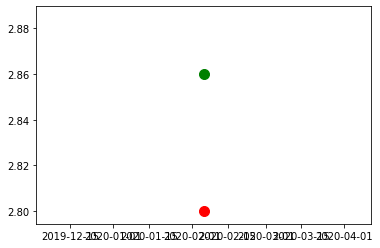

buy time:2020-02-05T15:12:39.537800486Z sell time:2020-02-05T15:12:42.324138963Z
{'rsi': 55.729737516868916, 'macd1': [0.0026727013408285316, 0.0005653692859097781, 0.003686230276660929, 0.00608934096426772, 0.009498167389438095], 'macd2': [0.033372698251487254, 0.0323568982671123, 0.03232859624507478, 0.032250852407534225, 0.03244761690980935], 'macd_signal': [0.024323965910764373, 0.019572246585793453, 0.01639504332396695, 0.014333902852027102, 0.0133667557595093]}
{'rsi': 48.07249150215602, 'macd': [-0.0017769409117174284, -0.0029617267433921235, -0.0007347841869909111, 0.0010100383788671508, -0.0002408796007093983], 'too_close': 1, 'macd_signal': [0.012062420706837416, 0.009057591216791509, 0.007099116136035024, 0.00588130058460145, 0.00465686454753928], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004897744148248678}


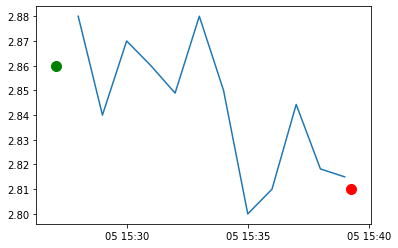

buy time:2020-02-05T15:27:05.067278098Z sell time:2020-02-05T15:39:16.290283324Z
{'rsi': 57.99767998244405, 'macd1': [0.0014540341541859902, 0.0027279631194163656, 0.0037029449227228284, 0.005429748957533231, 0.008100837600674815], 'macd2': [0.025596808248746328, 0.025284875575733334, 0.024959047273891866, 0.02482087569786895, 0.024930745230367535], 'macd_signal': [0.0039084964799894805, 0.0036723898078748576, 0.0036785008308444517, 0.004028750456182208, 0.004843167885080729]}
{'rsi': 46.58607181905701, 'macd': [0.0046395819755904455, 0.0025076189862520692, 0.0025956008259071517, 0.0012746048460812176, -0.00012973753879741423], 'too_close': 1, 'macd_signal': [0.006279298956229513, 0.005524962962234025, 0.00493909053496865, 0.004206193397191164, 0.0033390072099934486], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.003468744748790863}
CONN analysis


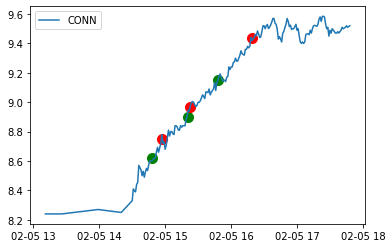

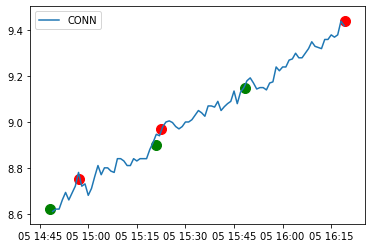

Delta = 0.4900000000000002


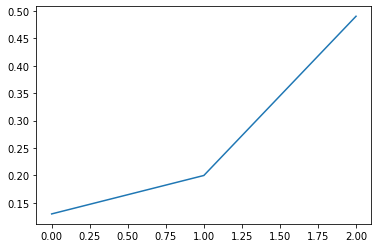

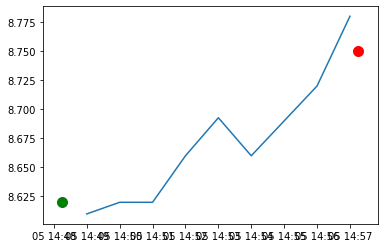

buy time:2020-02-05T14:48:15.445307998Z sell time:2020-02-05T14:57:14.004087947Z
{'rsi': 73.204264179737, 'macd1': [0.06993761498205409, 0.06900729056826371, 0.07267718123474332, 0.07472422171435156, 0.07707191187114582], 'macd2': [0.019757765389474713, 0.021618944978268217, 0.024336297418852126, 0.026797426077832753, 0.02933875648167117], 'macd_signal': [0.05848422766891449, 0.06058884024878434, 0.06300650844597613, 0.06535005109965122, 0.06769442325395014]}
{'rsi': 78.02221553205156, 'macd': [0.04880154564855843, 0.04792269650196168, 0.04817394786173068, 0.04930253401399476, 0.05110010070388782], 'too_close': 0, 'macd_signal': [0.04554274941013573, 0.046018738828500924, 0.046449780635146876, 0.04702033131091645, 0.047836285189510726], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0032638155143770928}


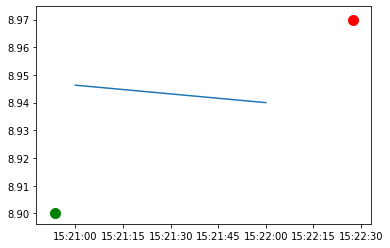

buy time:2020-02-05T15:20:53.473593157Z sell time:2020-02-05T15:22:27.350577909Z
{'rsi': 72.60526465798601, 'macd1': [0.06042376673507732, 0.058304326530125294, 0.05597935968544654, 0.056710746235221876, 0.05823293517040007], 'macd2': [0.06923894374244988, 0.06940218857874925, 0.0694413799478042, 0.07000611958011405, 0.07073360515213523], 'macd_signal': [0.06752251102417138, 0.06567887412536216, 0.06373897123737904, 0.06233332623694761, 0.0615132480236381]}
{'rsi': 78.25594345260676, 'macd': [0.030851344576957374, 0.03138998669826698, 0.03296048722528333, 0.03564190987977334, 0.03849961701470228], 'too_close': 0, 'macd_signal': [0.035856761547826035, 0.034963406577914226, 0.034562822707388044, 0.0347786401418651, 0.03552283551643254], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0029767814982697427}


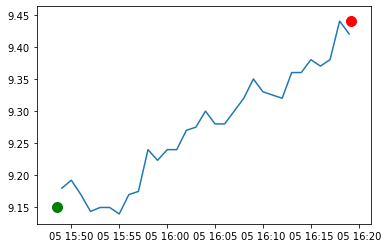

buy time:2020-02-05T15:48:27.227008361Z sell time:2020-02-05T16:19:12.972199819Z
{'rsi': 69.36809765989148, 'macd1': [0.05407156087262699, 0.0563969823164534, 0.05318872866342339, 0.054057604249642566, 0.05571774775166993], 'macd2': [0.08101652506611678, 0.0814620382869542, 0.08086198941370348, 0.08098027793229434, 0.0812794625662594], 'macd_signal': [0.05884170271343746, 0.058352758634040644, 0.057319952639917196, 0.05666748296186227, 0.0564775359198238]}
{'rsi': 78.51308014855596, 'macd': [0.03636343857406388, 0.036974777254298985, 0.036451472625206094, 0.036089787555456, 0.037936659091293734], 'too_close': 0, 'macd_signal': [0.03555816976566314, 0.035841491263390306, 0.035963487535753465, 0.03598874753969397, 0.03637832985001392], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0015583292412798128}
AVXL analysis


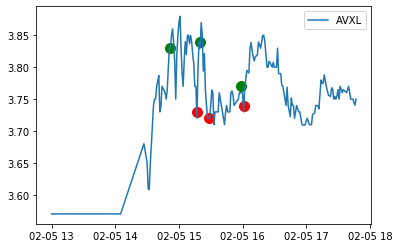

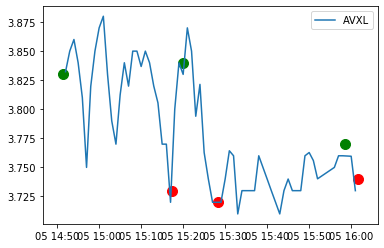

Delta = -0.24999999999999956


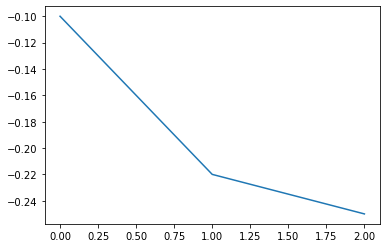

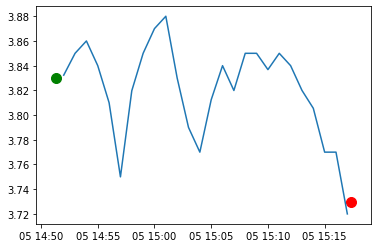

buy time:2020-02-05T14:51:20.911289927Z sell time:2020-02-05T15:17:20.304846588Z
{'rsi': 67.48649839468315, 'macd1': [0.047193647106338776, 0.04464699698407415, 0.043355496210401245, 0.044625625277063374, 0.047505348901632605], 'macd2': [0.023975223720257954, 0.024601232212494217, 0.025380936575463142, 0.026614273637794117, 0.0281862254514178], 'macd_signal': [0.0457007448335693, 0.04548999526367027, 0.04506309545301647, 0.04497560141782585, 0.0454815509145872]}
{'rsi': 38.862063640799704, 'macd': [0.010764017566082806, 0.008501545019399703, 0.004784013878875282, 0.0018251063164034242, -0.0025821606974241185], 'too_close': 1, 'macd_signal': [0.014099848403189051, 0.012980187726431182, 0.011340952956920001, 0.009437783628816686, 0.007033794763568526], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.009615955460992644}


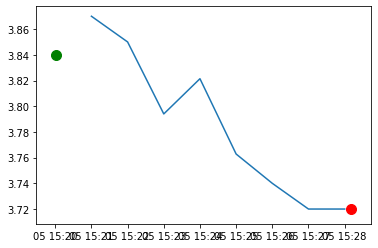

buy time:2020-02-05T15:20:00.959055015Z sell time:2020-02-05T15:28:10.869121956Z
{'rsi': 55.267315212389036, 'macd1': [0.01137107150513117, 0.006670480742216434, -0.0010769391517158056, -0.0007528158304181964, 0.002700589231343642], 'macd2': [0.033100913504324314, 0.031811781341558376, 0.029775179889383274, 0.0291333083735843, 0.029135915494196585], 'macd_signal': [0.021784479968468187, 0.018761680123217835, 0.014793956268231106, 0.011684601848501246, 0.009887799325069726]}
{'rsi': 40.36001580933542, 'macd': [0.003508892208912595, 0.0033757731205850128, 0.00018404690733575535, -0.0034898182836036185, -0.0073462091040288335], 'too_close': 1, 'macd_signal': [0.003809681496214546, 0.0037228998210886394, 0.0030151292383380625, 0.001714139733949726, -9.793003364598593e-05], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007248279070382848}


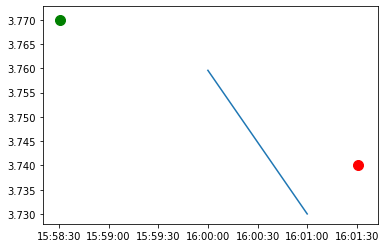

buy time:2020-02-05T15:58:30.467063364Z sell time:2020-02-05T16:01:30.875755549Z
{'rsi': 54.79391277858715, 'macd1': [-0.0060414677003710615, -0.005896473483624209, -0.0049339113652773214, -0.0033258195475949215, -0.0012302966756490008], 'macd2': [0.0042143117602466695, 0.0038455835463113708, 0.003656928626499134, 0.003637447345013811, 0.003773642379769182], 'macd_signal': [-0.011575043429952555, -0.010439329440686885, -0.009338245825604972, -0.008135760570002962, -0.00675466779113217]}
{'rsi': 46.81472213739864, 'macd': [-0.0024451889165986174, -0.0014101909951875768, -0.000585384939604694, 4.4144258766198874e-05, -0.00048406862898042746], 'too_close': 0, 'macd_signal': [-0.005429738022684876, -0.004625828617185416, -0.0038177398816692716, -0.0030453630535821775, -0.0025331041686618276], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0020490355396814}
OBSV analysis


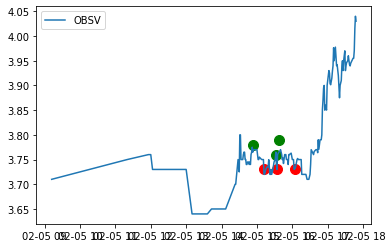

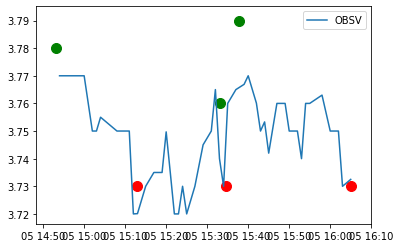

Delta = -0.13999999999999968


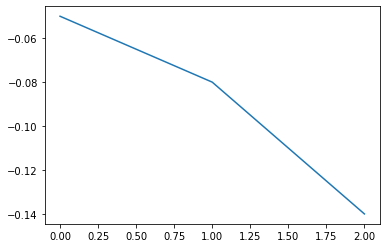

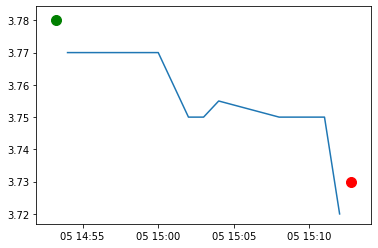

buy time:2020-02-05T14:53:14.72630767Z sell time:2020-02-05T15:12:46.411976367Z
{'rsi': 67.4556115240374, 'macd1': [0.031192481250455373, 0.030524646190833504, 0.030052414777273828, 0.030137676036994687, 0.030259887268548447], 'macd2': [0.02697339603775406, 0.02737396637564249, 0.027778691078552686, 0.028266558642360273, 0.028750172008914276], 'macd_signal': [0.038888797036886365, 0.037215966867675795, 0.0357832564495954, 0.03465414036707526, 0.033775289747369895]}
{'rsi': 38.3281274457224, 'macd': [0.006675243627209948, 0.005726045625350729, 0.004912046589806707, 0.004213968814190228, 0.00257632419923981], 'too_close': 1, 'macd_signal': [0.010889903009429016, 0.009857131532613358, 0.008868114544052027, 0.007937285398079667, 0.006865093158311695], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004288768959071885}


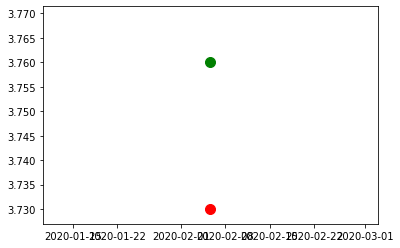

buy time:2020-02-05T15:33:04.030678966Z sell time:2020-02-05T15:34:34.60449509Z
{'rsi': 60.951369274397074, 'macd1': [-0.0033703014352628458, -0.003270297414331491, -0.001958097142498172, -0.0005088451102355229, 0.0018289887624516332], 'macd2': [0.018494871041533578, 0.0179450277051445, 0.01765035772199708, 0.01743099064398379, 0.017441191519999677], 'macd_signal': [0.00047308645024941485, -0.0002755903226667664, -0.0006120916866330474, -0.0005914423713535425, -0.00010735614459250731]}
{'rsi': 46.117015245298084, 'macd': [-0.0021181337225666397, -0.0010974681984787793, 0.0004913291994919078, 0.00042427094856689607, -0.00015297276577141972], 'too_close': 1, 'macd_signal': [-0.0016094169205299554, -0.0015070271761197201, -0.0011073559009973945, -0.0008010305310845364, -0.000671418978021913], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0005184462122504933}


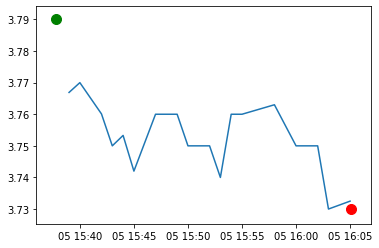

buy time:2020-02-05T15:37:49.126293912Z sell time:2020-02-05T16:05:05.776831633Z
{'rsi': 63.877762920924944, 'macd1': [0.0018289887624516332, 0.0016454798164091677, 0.0006852322966732771, 0.002318255096918076, 0.005964432446432966], 'macd2': [0.017441191519999677, 0.01702284183972491, 0.016450785069764162, 0.016377971887853615, 0.016764595230865265], 'macd_signal': [-0.00010735614459250731, 0.00024321104760782774, 0.0003316152974209176, 0.0007289432573203493, 0.0017760410951428727]}
{'rsi': 41.2823671525414, 'macd': [0.0016359342090934703, 0.0020105538225982933, 0.001601029445815083, 0.0012611269516225043, -5.907144582151247e-05], 'too_close': 1, 'macd_signal': [0.0018055952524181139, 0.0018465869664541497, 0.0017974754623263363, 0.0016902057601855698, 0.0013403503189841535], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.001399421764805666}
VVUS analysis


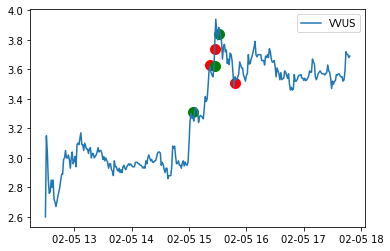

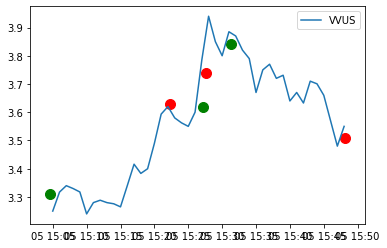

Delta = 0.10999999999999988


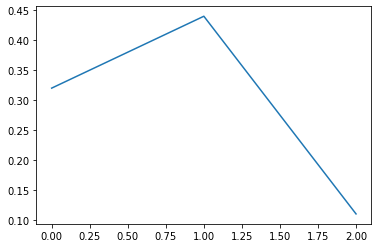

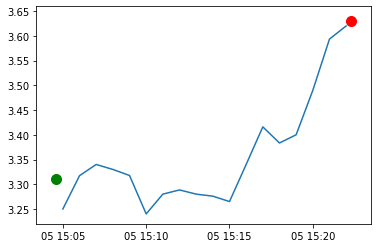

buy time:2020-02-05T15:04:36.404725163Z sell time:2020-02-05T15:22:18.229252316Z
{'rsi': 74.69949470379399, 'macd1': [0.07562768551713583, 0.09107151350992737, 0.10709535010245741, 0.1158764716481433, 0.12502548172925776], 'macd2': [0.09668353924758266, 0.10033601051549201, 0.10453072956603071, 0.10771102769358976, 0.11118444707813158], 'macd_signal': [0.08946410625413495, 0.08978558770529343, 0.09324754018472622, 0.09777332647740963, 0.10322375752777926]}
{'rsi': 78.24513597261452, 'macd': [0.05518198215922343, 0.05521441753590839, 0.055384959160131864, 0.0594634986184861, 0.06759400340917132], 'too_close': 0, 'macd_signal': [0.059341464759893894, 0.05851605531509679, 0.05788983608410381, 0.05820456859098026, 0.060082455554618476], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0075115478545528455}


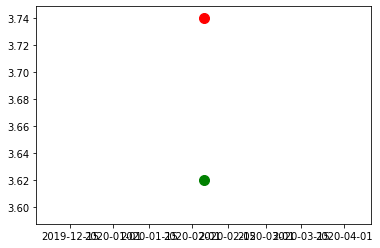

buy time:2020-02-05T15:27:10.102056874Z sell time:2020-02-05T15:27:33.662130721Z
{'rsi': 73.50139810790773, 'macd1': [0.13000186297105198, 0.12970861242587528, 0.127003545902721, 0.12742546192130177, 0.12789932248376434], 'macd2': [0.13495800097907162, 0.13628775337432808, 0.13709327486492695, 0.1384147989954383, 0.13972914039021012], 'macd_signal': [0.11390438121413675, 0.11706522745648446, 0.11905289114573177, 0.12072740530084577, 0.12216178873742949]}
{'rsi': 78.05616716951161, 'macd': [0.07591586386650828, 0.0756478610058191, 0.07380723720520654, 0.07401185194232385, 0.07996334586809928], 'too_close': 0, 'macd_signal': [0.06540451778303052, 0.06745318642758824, 0.0687239965831119, 0.06978156765495429, 0.07181792329758328], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.008145422570515995}


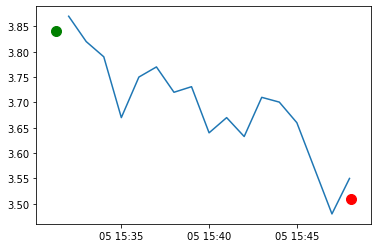

buy time:2020-02-05T15:31:17.65005529Z sell time:2020-02-05T15:48:05.610531926Z
{'rsi': 71.62092360447352, 'macd1': [0.141061715646158, 0.16249454445456468, 0.17026334714542912, 0.170421088887327, 0.17179343824194948], 'macd2': [0.1423680848124409, 0.14825494539847606, 0.1519961075043832, 0.1543953196497947, 0.15699548193207846], 'macd_signal': [0.12479426736990822, 0.13233432278683951, 0.13992012765855744, 0.14602031990431136, 0.15117494357183897]}
{'rsi': 40.072670725832886, 'macd': [0.028060232234990323, 0.023327162806820567, 0.014660781917248844, 0.003042033406968958, -0.006051043788144916], 'too_close': 1, 'macd_signal': [0.04823195088385242, 0.043250993268446045, 0.0375329509982066, 0.030634767479959073, 0.023297605226338274], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.02934864901448319}
QEP analysis


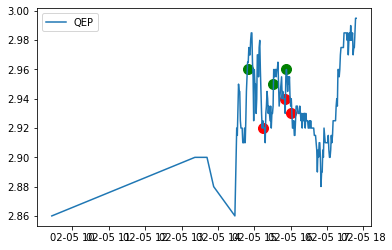

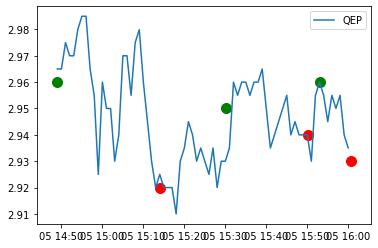

Delta = -0.08000000000000007


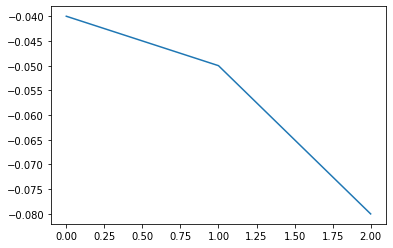

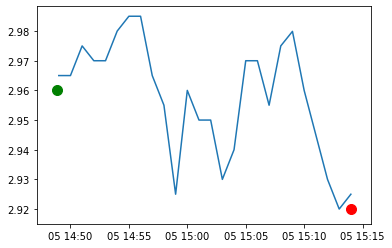

buy time:2020-02-05T14:48:48.819434336Z sell time:2020-02-05T15:14:01.82094512Z
{'rsi': 63.83432841737857, 'macd1': [0.024496383379474906, 0.02359398592578099, 0.02301696244011442, 0.023898018541770316, 0.025512543766238238], 'macd2': [0.011373205844158463, 0.011813307517080318, 0.012279289412052474, 0.013008240704608376, 0.013897998386077415], 'macd_signal': [0.026214492725097564, 0.02569039136523425, 0.025155705580210283, 0.02490416817252229, 0.02502584329126548]}
{'rsi': 42.38394965590023, 'macd': [0.00587641492029789, 0.004522662641825548, 0.002629834078836435, 0.0006012685222365199, -0.0009872405935844597], 'too_close': 1, 'macd_signal': [0.0068769361906815835, 0.006406081480910377, 0.0056508320004955885, 0.004640919304843775, 0.0035152873251581276], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004502527918742587}


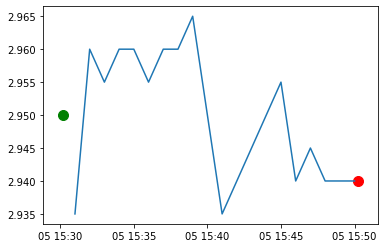

buy time:2020-02-05T15:30:10.277273849Z sell time:2020-02-05T15:50:12.667980731Z
{'rsi': 55.32970580382644, 'macd1': [-0.0031844011492232482, -0.0027284565213583356, -0.003536722621790389, -0.003331954209059962, -0.0015381105328859945], 'macd2': [0.010028423804731457, 0.00975011901044942, 0.009238571706297272, 0.008913092044690263, 0.008919257150832749], 'macd_signal': [-0.0024686195934109484, -0.002520586979000426, -0.0027238141075584185, -0.002845442127858727, -0.0025839758088641806]}
{'rsi': 47.48471257590487, 'macd': [0.0011869947144154125, 0.00094751052787867, 0.0004888538821630206, 0.00012511034157736134, -0.00015995099318555361], 'too_close': 1, 'macd_signal': [0.0018853917758994226, 0.001697815526295272, 0.0014560231974688218, 0.0011898406262905296, 0.0009198823023953129], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0010798332955808665}


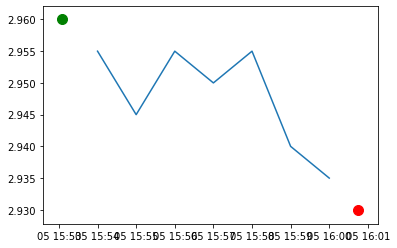

buy time:2020-02-05T15:53:04.739614285Z sell time:2020-02-05T16:00:44.810667521Z
{'rsi': 57.17908286207577, 'macd1': [0.0005028019635626713, 5.3420581279439716e-05, -0.0010969884285580989, 8.497258077166947e-06, 0.0012733820865453715], 'macd2': [0.006868361327720507, 0.0066117194511226, 0.0062050901684926885, 0.006220894110913644, 0.006305452805462686], 'macd_signal': [0.0021315834857036794, 0.0017159509048188313, 0.0011533630381434451, 0.0009243898821301895, 0.000994188323013226]}
{'rsi': 42.717186572464236, 'macd': [0.0011391225301293773, 0.00111789035236054, 0.001346568001471038, 0.0007280497020576426, -0.0002828483195900233], 'too_close': 1, 'macd_signal': [0.0007295800670757084, 0.0008072421241326747, 0.0009151072996003474, 0.0008776957800918064, 0.0006455869601554405], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0009284352797454638}
LTRPA analysis


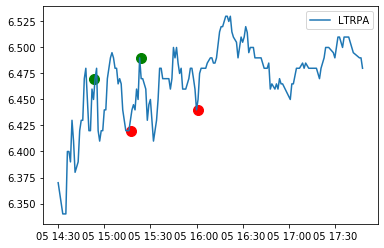

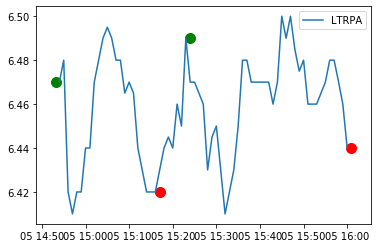

Delta = -0.09999999999999964


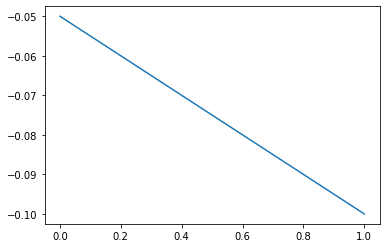

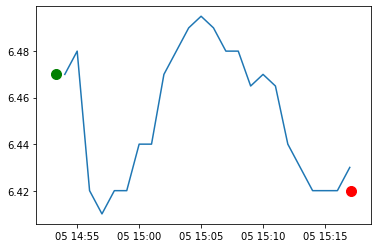

buy time:2020-02-05T14:53:19.136173094Z sell time:2020-02-05T15:17:06.577992618Z
{'rsi': 62.78144530880524, 'macd1': [0.05447622911195271, 0.050978967344701864, 0.047657990548767515, 0.04770385783914666, 0.047993880840564884], 'macd2': [0.025468268646363867, 0.026100495176772043, 0.02664041971326281, 0.02773430403138022, 0.028856291476346385], 'macd_signal': [0.04685103058972724, 0.047676617940722164, 0.04767289246233124, 0.04767908553769432, 0.04774204459826843]}
{'rsi': 45.27423209432525, 'macd': [0.007470944080021802, 0.00482503736692852, 0.002700629053260073, 0.0010101728471125782, -0.0003201848829652576], 'too_close': 0, 'macd_signal': [0.013191210392009354, 0.011517975786993187, 0.009754506440246564, 0.008005639721619768, 0.006340474800702762], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00666065968366802}


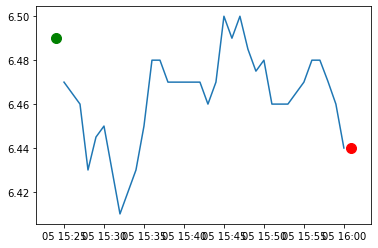

buy time:2020-02-05T15:24:01.974633861Z sell time:2020-02-05T16:00:55.117355799Z
{'rsi': 63.17083600037796, 'macd1': [0.0029670723826233925, 0.004239259217876601, 0.004389955351276065, 0.006053435736688151, 0.008883188907747197], 'macd2': [0.02580551099551709, 0.025560887872117632, 0.02513500968002269, 0.025022860236307842, 0.02519953064377134], 'macd_signal': [0.008513275467665601, 0.007658472217707801, 0.0070047688444214535, 0.006814502222874793, 0.007228239559849274]}
{'rsi': 40.237660326088154, 'macd': [0.0022401434293373157, 0.0024994525606931717, 0.0021703499025198525, 0.0013454601701443636, -0.000353745597553079], 'too_close': 1, 'macd_signal': [0.0032725937367349836, 0.0031179655015266213, 0.0029284423817252676, 0.0026118459394090868, 0.0020187276320166535], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0023724732295697325}
GHL analysis


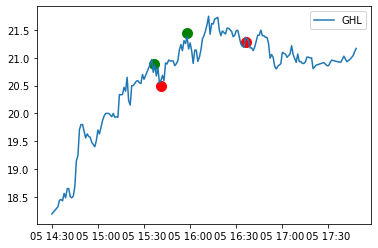

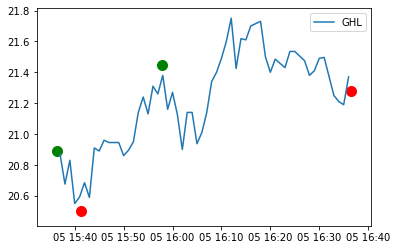

Delta = -0.5599999999999987


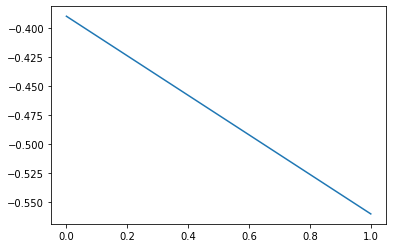

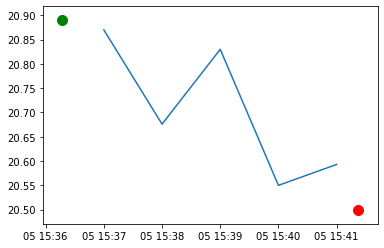

buy time:2020-02-05T15:36:16.718593061Z sell time:2020-02-05T15:41:21.878143957Z
{'rsi': 72.48807390545387, 'macd1': [0.2612896240579232, 0.2521778888238302, 0.2475498582122313, 0.2572566734514403, 0.26811236432601504], 'macd2': [0.44332469281844666, 0.4401031425806501, 0.4375148980114787, 0.4376725907960832, 0.4383571812535756], 'macd_signal': [0.28331893014404436, 0.2770907218800015, 0.27118254914644746, 0.268397374007446, 0.2683403720711598]}
{'rsi': 50.89701296240984, 'macd': [0.140420389121914, 0.12764308777644473, 0.12402904662703662, 0.10505668928169243, 0.08666450577516827], 'too_close': 1, 'macd_signal': [0.1449967964440318, 0.14152605471051438, 0.13802665309381884, 0.13143266033139356, 0.1224790294201485], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.03581452364498024}


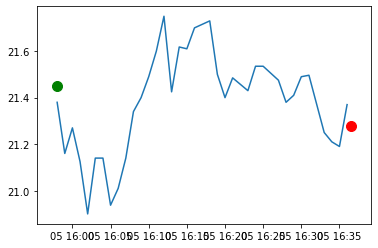

buy time:2020-02-05T15:57:55.339181974Z sell time:2020-02-05T16:36:33.168976088Z
{'rsi': 70.3342492280246, 'macd1': [0.15584084691769817, 0.17093018017986594, 0.1720294563233864, 0.18528923727545177, 0.2047344874541288], 'macd2': [0.3574034241442483, 0.3569103172147834, 0.3541265186087976, 0.3538778074265494, 0.35532211144091974], 'macd_signal': [0.15995247089837514, 0.1621480127546733, 0.16412430146841592, 0.16835728862982308, 0.17563272839468422]}
{'rsi': 43.01736102232345, 'macd': [0.03756076358070359, 0.03561174726355887, 0.020835737831188084, 0.006973448171795127, -0.00495786127931197], 'too_close': 1, 'macd_signal': [0.059515246204655016, 0.054734546416435784, 0.047954784699386244, 0.03975851739386802, 0.030815241659232023], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.035773102938543994}
SM analysis


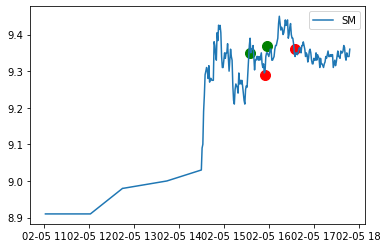

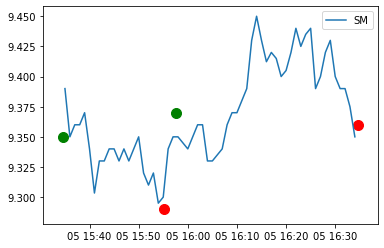

Delta = -0.07000000000000028


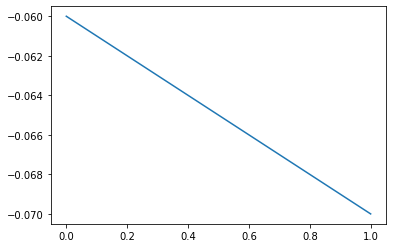

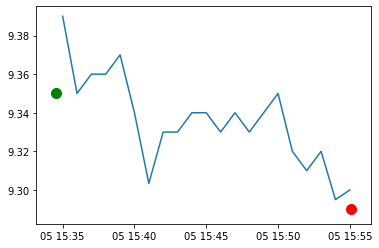

buy time:2020-02-05T15:34:33.756619686Z sell time:2020-02-05T15:55:05.544009211Z
{'rsi': 62.49945525955861, 'macd1': [-0.012073171421064899, -0.010890573548616445, -0.006744770958537316, -0.0006277487474104504, 0.005767385449312101], 'macd2': [0.040381229369561567, 0.03912689990423068, 0.038530850444278286, 0.038480617253904725, 0.038692728793261466], 'macd_signal': [-0.009655473342328814, -0.00990249338358634, -0.009270948898576535, -0.007542308868343318, -0.004880370004812234]}
{'rsi': 43.5045180111827, 'macd': [0.006093030508871777, 0.004344248490349756, 0.00344462291110581, 0.001400179305056426, -0.0004708180412809071], 'too_close': 1, 'macd_signal': [0.007987991670583342, 0.007259243034536625, 0.006496319009850462, 0.0054770910688916544, 0.0042875092468571425], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00475832728813805}


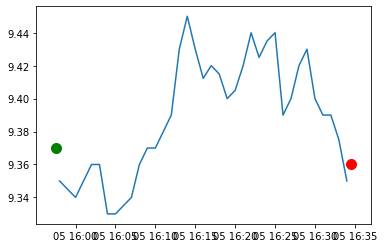

buy time:2020-02-05T15:57:35.872333743Z sell time:2020-02-05T16:34:32.568723288Z
{'rsi': 59.68838443955693, 'macd1': [0.006809165894903657, 0.003638990876503101, 0.0015126259375684015, 0.003020315789541428, 0.006560297117559344], 'macd2': [0.030715587113327558, 0.029499542538788504, 0.02841353024923876, 0.028008664835702746, 0.02807118783614726], 'macd_signal': [0.011455474119460967, 0.009892177470869394, 0.008216267164209196, 0.007177076889275642, 0.007053720934932383]}
{'rsi': 41.108825672297534, 'macd': [0.007276912056990881, 0.005416860820346869, 0.003897121404515147, 0.001883076127183969, -0.0004899861165430508], 'too_close': 1, 'macd_signal': [0.010144079442954427, 0.009198635718432916, 0.008138332855649362, 0.006887281509956283, 0.005411827984656416], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005901814101199467}
ATRA analysis


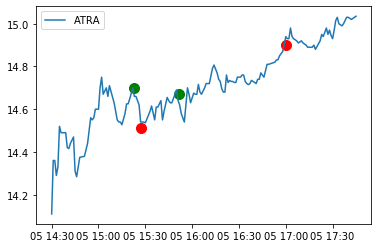

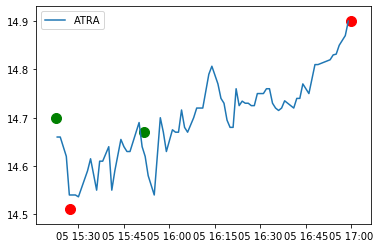

Delta = 0.040000000000000924


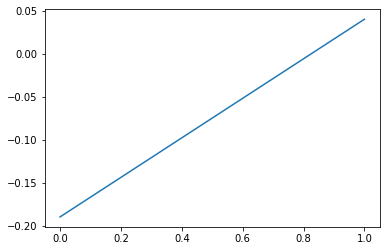

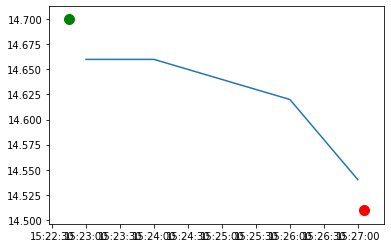

buy time:2020-02-05T15:22:44.898318275Z sell time:2020-02-05T15:27:05.392945146Z
{'rsi': 63.64903093600552, 'macd1': [0.05665916341170529, 0.055933873194323525, 0.05472820281666557, 0.0550185955086242, 0.058743335133280894], 'macd2': [0.0821846314816348, 0.08226173360794498, 0.08220110388311852, 0.08238650435798434, 0.08325218227691167], 'macd_signal': [0.08356102633323995, 0.07803559570545666, 0.07337411712769845, 0.06970301280388361, 0.06751107726976306]}
{'rsi': 44.985789472252215, 'macd': [0.03136405791370933, 0.030890321138052457, 0.030120002596786932, 0.02705066343999718, 0.018593377558863367], 'too_close': 1, 'macd_signal': [0.036772989640034934, 0.035596455939638436, 0.034501165271068134, 0.03301106490485394, 0.030127527435655825], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.011534149876792459}


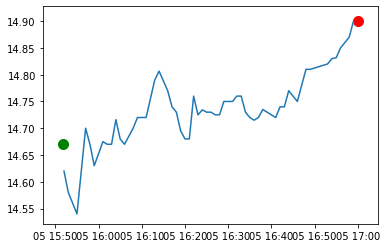

buy time:2020-02-05T15:51:43.323634181Z sell time:2020-02-05T16:59:56.127066654Z
{'rsi': 59.30532102164414, 'macd1': [0.016844509557099485, 0.018572071686707048, 0.01891620644139458, 0.01897025838376898, 0.023582746277266864], 'macd2': [0.06533817796437802, 0.06470000845384938, 0.06384945744323645, 0.06296480502212809, 0.063009809244015], 'macd_signal': [0.02064158495334501, 0.020227682300017417, 0.01996538712829285, 0.019766361379388076, 0.020529638358963834]}
{'rsi': 78.1289666526605, 'macd': [0.0162654888006859, 0.0180147055159523, 0.019663254832835264, 0.02121195228972006, 0.023701691187426377], 'too_close': 0, 'macd_signal': [0.011010897339567621, 0.012411658974844557, 0.013861978146442699, 0.015331972975098172, 0.017005916617563812], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.006695774569862565}
CPE analysis


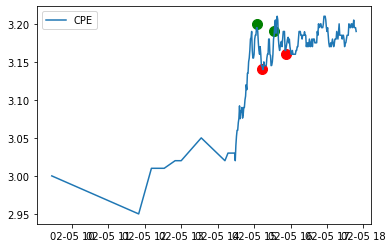

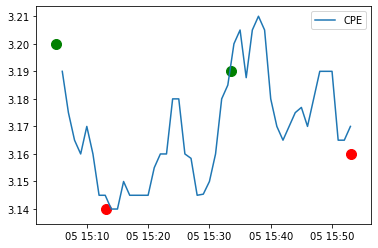

Delta = -0.08999999999999986


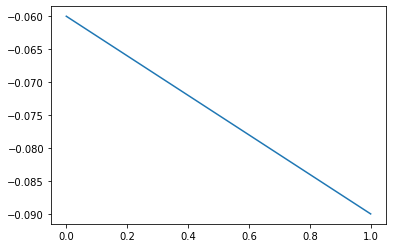

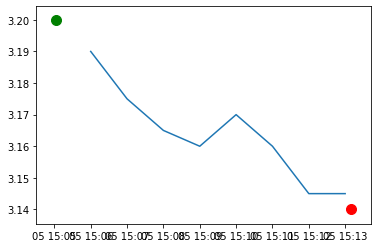

buy time:2020-02-05T15:05:02.446023738Z sell time:2020-02-05T15:13:09.985233681Z
{'rsi': 74.46030578129277, 'macd1': [0.032057474911153516, 0.03190949722728531, 0.03142991930143646, 0.03149372668943018, 0.03158367576333543], 'macd2': [0.026507855256889812, 0.02702633651897779, 0.02746013101637379, 0.02797525321327221, 0.02848440761639548], 'macd_signal': [0.034753391649752274, 0.03418461276525888, 0.033633674072494395, 0.03320568459588155, 0.032881282829372326]}
{'rsi': 45.485504536506284, 'macd': [0.011880010192569124, 0.010744907204332854, 0.009201386600456107, 0.0070999239662605795, 0.005110473550442585], 'too_close': 1, 'macd_signal': [0.016187449155822358, 0.015098940765524458, 0.013919429932510788, 0.012555528739260746, 0.011066517701497114], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005956044151054529}


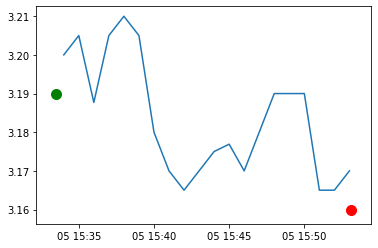

buy time:2020-02-05T15:33:30.493783143Z sell time:2020-02-05T15:53:06.818555994Z
{'rsi': 65.14509041431847, 'macd1': [0.0023094709909066147, 0.001645233688340575, 0.0019037915431585617, 0.003680111326355817, 0.0058275970673067334], 'macd2': [0.018790952842998365, 0.018274846794027688, 0.01793072068212931, 0.017905308020710997, 0.01801322654689841], 'macd_signal': [0.0045059366245873735, 0.003933796037338014, 0.003527795138502123, 0.003558258376072862, 0.004012126114319637]}
{'rsi': 44.98531413251142, 'macd': [0.0025425327070220938, 0.002779149434393169, 0.001628731956573315, 0.0007111503900048, -1.8278757840661797e-05], 'too_close': 1, 'macd_signal': [0.0029841474030971055, 0.002943147809356318, 0.0026802646387997175, 0.002286441789040734, 0.0018254976796644549], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0018437764375051166}
BRY analysis


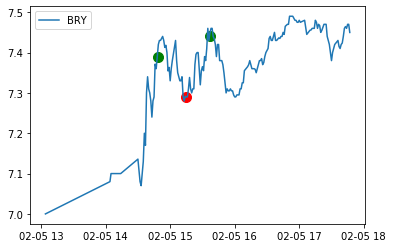

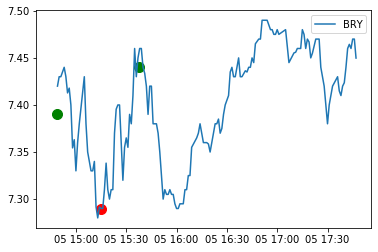

Delta = nan


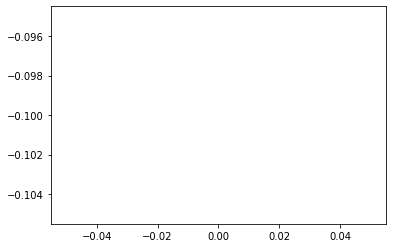

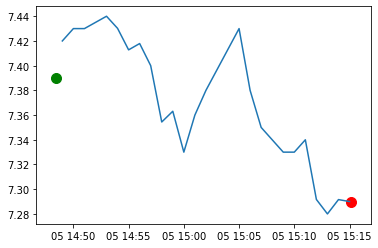

buy time:2020-02-05T14:48:27.722308163Z sell time:2020-02-05T15:15:08.750339404Z
{'rsi': 71.7764885267283, 'macd1': [0.11537340445268818, 0.11307696862699768, 0.11728030843733173, 0.11832759394756653, 0.12019281656729408], 'macd2': [0.04636064413348073, 0.048956863627640956, 0.0527289842200247, 0.05593279611374502, 0.059270756922619405], 'macd_signal': [0.10104473561425499, 0.10345118221680352, 0.10621700746090916, 0.10863912475824064, 0.11094986312005133]}
{'rsi': 45.349377367088174, 'macd': [0.013996859610681867, 0.009200288814653845, 0.004735424703273594, 0.0017974081917664364, -0.0005984151703399831], 'too_close': 0, 'macd_signal': [0.027561120054343254, 0.02388895380640537, 0.020058247985779015, 0.0164060800269765, 0.013005180987513205], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.013603596157853188}


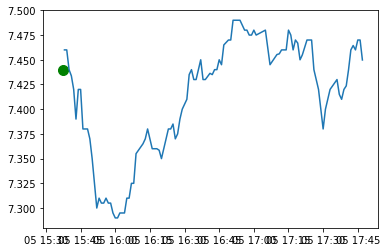

buy time:2020-02-05T15:37:20.962550034Z sell time:None
{'rsi': 61.60752661641633, 'macd1': [0.014986839307860045, 0.017734469046558843, 0.023673672186034445, 0.025663946187776787, 0.027728531845121474], 'macd2': [0.04750781889523825, 0.04737388553815158, 0.04797457478372902, 0.047970691399058296, 0.04805033216926091], 'macd_signal': [0.013242108737730119, 0.014140580799495863, 0.01604719907680358, 0.01797054849899822, 0.019922145168222872]}
None
CEIX analysis


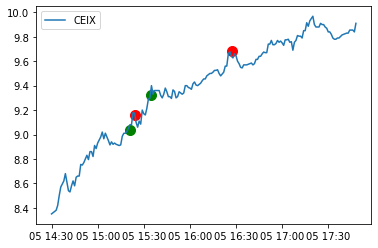

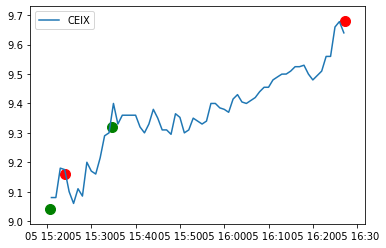

Delta = 0.4800000000000004


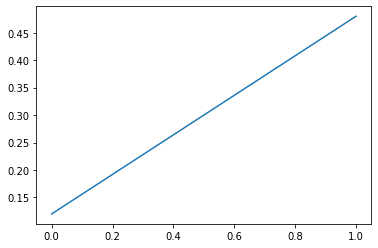

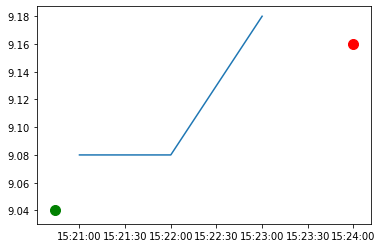

buy time:2020-02-05T15:20:43.800068095Z sell time:2020-02-05T15:23:59.505713235Z
{'rsi': 70.969557504131, 'macd1': [0.06921156645876003, 0.07053757992992793, 0.07077263230842235, 0.07134684562709204, 0.0721802395875617], 'macd2': [0.10231176164138134, 0.10274807901519445, 0.10298517376172711, 0.10327850215706036, 0.10362309817026905], 'macd_signal': [0.0888556349946206, 0.08519202398168206, 0.08230814564703012, 0.0801158856430425, 0.07852875643194634]}
{'rsi': 79.0684469106936, 'macd': [0.03827704927608089, 0.03950314766452934, 0.04150396267287171, 0.042524026800505155, 0.04692246603242012], 'too_close': 0, 'macd_signal': [0.04354846341103428, 0.04273940026173329, 0.042492312743960974, 0.04249865555526981, 0.043383417650699876], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0035390483817202417}


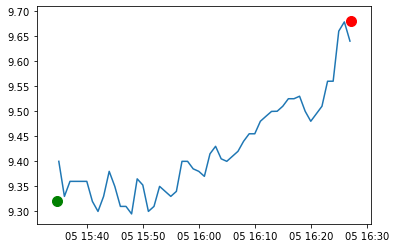

buy time:2020-02-05T15:34:36.127336529Z sell time:2020-02-05T16:27:13.910659893Z
{'rsi': 73.96013641017495, 'macd1': [0.07929080268085187, 0.07794311247088359, 0.08038645361725116, 0.08736757327760003, 0.09503235280319977], 'macd2': [0.10846894430313014, 0.10843535162906726, 0.10911066624340648, 0.11075699021886543, 0.11273426471173131], 'macd_signal': [0.07972308448197521, 0.07936709007975688, 0.07957096278725574, 0.0811302848853246, 0.08391069846889963]}
{'rsi': 80.57800084277041, 'macd': [0.025521199057699562, 0.026367416279533984, 0.03187917753967007, 0.03671588530679415, 0.040091035705762224], 'too_close': 0, 'macd_signal': [0.026405286091786866, 0.02639771212933629, 0.027494005211403043, 0.029338381230481263, 0.031488912125537456], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.008602123580224767}
SELB analysis


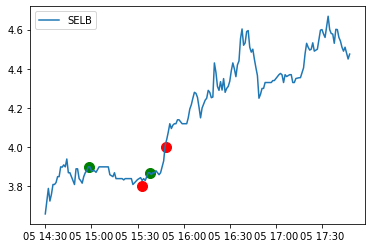

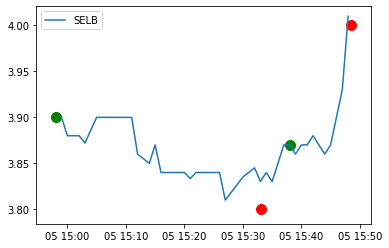

Delta = 0.029999999999999805


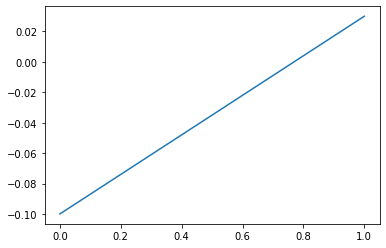

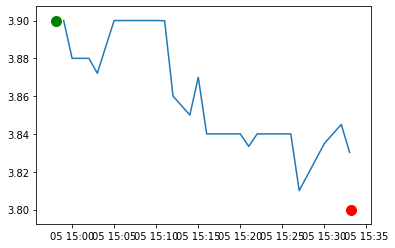

buy time:2020-02-05T14:58:06.883920847Z sell time:2020-02-05T15:33:09.551560937Z
{'rsi': 61.513431777181914, 'macd1': [0.031212575968156298, 0.029255454482894017, 0.028984143296630016, 0.029294835178655276, 0.030744011608405675], 'macd2': [0.028825651003998587, 0.02894764828140506, 0.029333464011987775, 0.029812643596163202, 0.030514499513317972], 'macd_signal': [0.04389087442634339, 0.04096379043765351, 0.03856786100944881, 0.036713255843290105, 0.035519406996313216]}
{'rsi': 33.80520832930328, 'macd': [-0.004791529985432419, -0.006357045569683084, -0.006195667511051717, -0.005469974640545772, -0.00821008442144322], 'too_close': 1, 'macd_signal': [-0.0020169127705901724, -0.0028849393304087546, -0.003547084966537347, -0.003931662901339032, -0.00478734720535987], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0034227372160833503}


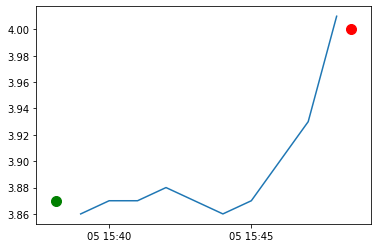

buy time:2020-02-05T15:38:07.63331829Z sell time:2020-02-05T15:48:31.034921247Z
{'rsi': 58.98856640493647, 'macd1': [-0.007439508507495862, -0.006858861512468728, -0.007123495786877765, -0.004058767702304955, -0.0008136529043945018], 'macd2': [0.017491201212587626, 0.01690246539519924, 0.016173840454219324, 0.016117358506593682, 0.016199551871042495], 'macd_signal': [-0.00469346265213969, -0.0051265424242054975, -0.005525933096739951, -0.005232500017852952, -0.004348730595161262]}
{'rsi': 78.01517167814518, 'macd': [0.0026838782071849643, 0.0029630574551227085, 0.004700560019033961, 0.00755185344521081, 0.013608032044241991], 'too_close': 0, 'macd_signal': [0.0004975627207749601, 0.0009906616676445099, 0.0017326413379224002, 0.0028964837593800823, 0.005038793416352464], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.008569238627889527}
RES analysis


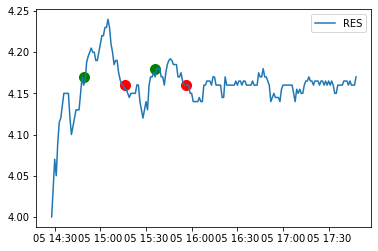

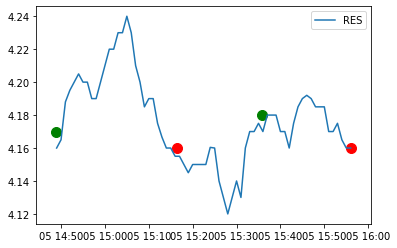

Delta = -0.02999999999999936


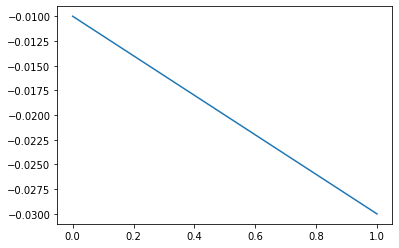

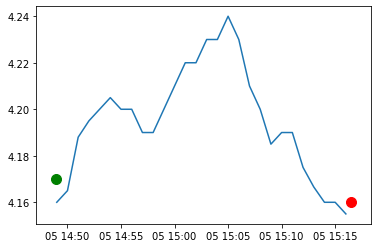

buy time:2020-02-05T14:48:58.028451911Z sell time:2020-02-05T15:16:29.829709868Z
{'rsi': 66.16306517668453, 'macd1': [0.03781625804756317, 0.03692218853281126, 0.03580094103797382, 0.03610992444187122, 0.03753593794131316], 'macd2': [0.01650332757723305, 0.017304785428069458, 0.018014475701185084, 0.018958473868171843, 0.020116532999225], 'macd_signal': [0.03734799154937067, 0.03726283094605879, 0.0369704529644418, 0.036798347259927686, 0.03694586539620478]}
{'rsi': 41.956617329722704, 'macd': [0.0064850893318118, 0.004253838799496812, 0.0021171002184789955, 0.00042461430835505354, -0.0008997203528897657], 'too_close': 0, 'macd_signal': [0.012903062591609475, 0.011173217833186942, 0.009361994310245352, 0.007574518309867292, 0.005879670577315881], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006779390930205647}


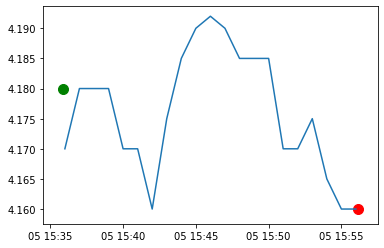

buy time:2020-02-05T15:35:51.537343189Z sell time:2020-02-05T15:56:06.461990081Z
{'rsi': 61.15591384693752, 'macd1': [-0.011092490387388132, -0.00881993771724332, -0.006141214825053254, -0.0039725149542482185, -0.001031539101575163], 'macd2': [0.013027721579115692, 0.01274548861745739, 0.012625376662541044, 0.012494677296322365, 0.012594350246800445], 'macd_signal': [-0.008552105056677212, -0.008605671588790434, -0.008112780236042998, -0.0072847271796840415, -0.006034089564062266]}
{'rsi': 42.680337805709556, 'macd': [0.002742188441937188, 0.002360887414671886, 0.0015136283360925873, 0.0005740286860813626, -0.00016558180335746187], 'too_close': 1, 'macd_signal': [0.003444253932822245, 0.0032275806291921735, 0.0028847901705722563, 0.0024226378736740776, 0.0019049939382677697], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0020705757416252316}
WLL analysis


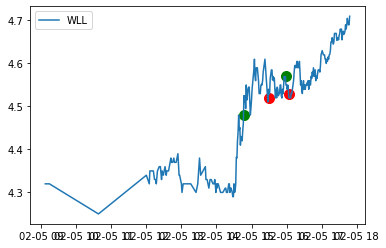

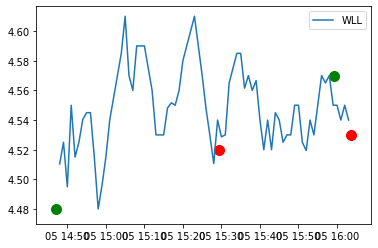

Delta = -8.881784197001252e-16


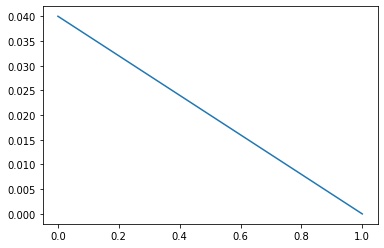

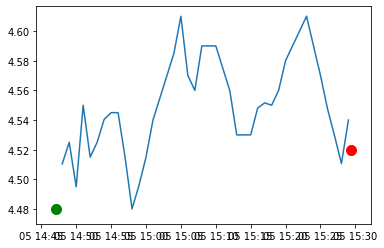

buy time:2020-02-05T14:47:09.62105788Z sell time:2020-02-05T15:29:23.524429414Z
{'rsi': 68.6385114531876, 'macd1': [0.06061809825713027, 0.058969011990044784, 0.05661409811138718, 0.057410514894645104, 0.05887197516762832], 'macd2': [0.014657068728100242, 0.01614372198037195, 0.017407302246487788, 0.01920093238777021, 0.021119500650681466], 'macd_signal': [0.04805277075763216, 0.05023601900411469, 0.05151163482556918, 0.05269141083938437, 0.05392752370503316]}
{'rsi': 42.82445890878749, 'macd': [0.010256308730269836, 0.007926134647705751, 0.005067218029504161, 0.0017918645863659322, -0.00030051296135713557], 'too_close': 1, 'macd_signal': [0.011068906236860031, 0.010440351919029176, 0.009365725141124173, 0.007850953030172525, 0.006220659831866593], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0065211727932237284}


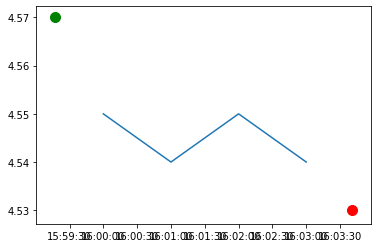

buy time:2020-02-05T15:59:17.132877724Z sell time:2020-02-05T16:03:40.458971849Z
{'rsi': 57.43604791344509, 'macd1': [-0.005307872959796178, -0.0037852233731729967, -0.000953686251195407, 0.0008767623344132502, 0.0029869227666203813], 'macd2': [0.01617267414245216, 0.01583724933572217, 0.0158231903682573, 0.01570498067389181, 0.015708651033976118], 'macd_signal': [-0.00437043603992022, -0.004253393506570775, -0.0035934520554957014, -0.002699409177513911, -0.0015621427886870524]}
{'rsi': 45.201760102944036, 'macd': [0.0015574690610664632, 0.0014408325469101868, 0.0008117543209849032, 0.000830501751159396, -0.0002046366376795561], 'too_close': 1, 'macd_signal': [-0.0007324784709900435, -0.0002978162674099974, -7.59021497310173e-05, 0.00010537863044706534, 4.3375576821741044e-05], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00024801221450129713}
CRC analysis


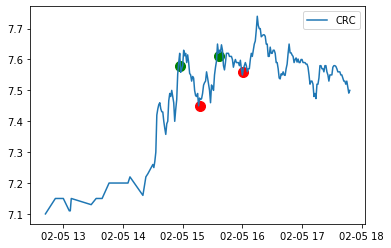

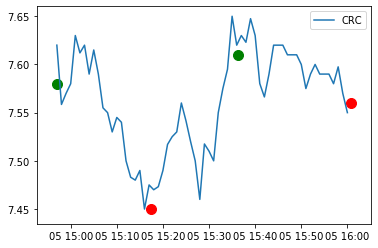

Delta = -0.1800000000000006


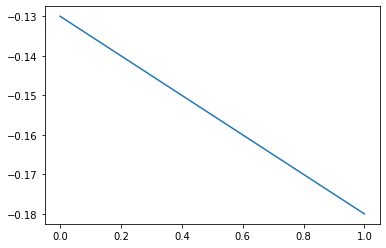

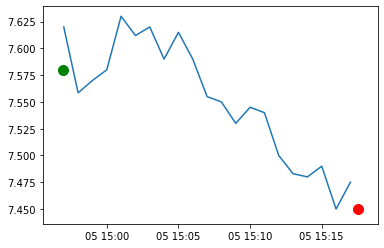

buy time:2020-02-05T14:56:56.261624586Z sell time:2020-02-05T15:17:30.750167905Z
{'rsi': 71.05646825896068, 'macd1': [0.09798934919017555, 0.09155572001952272, 0.08800850947249206, 0.0908235609302599, 0.09417183701904985], 'macd2': [0.08236027955623904, 0.08275619351879904, 0.08349668662306708, 0.08536709361484274, 0.08738802048953875], 'macd_signal': [0.11462602983106247, 0.11001196786875453, 0.10561127618950203, 0.10265373313765361, 0.10095735391393286]}
{'rsi': 41.17107757617759, 'macd': [0.012487723818185081, 0.00828043454054761, 0.005413969719784362, 0.0010321273955558041, -0.0023956994466427517], 'too_close': 0, 'macd_signal': [0.02807454222078782, 0.02411572068473978, 0.020375370491748694, 0.016506721872510115, 0.012726237608679542], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.015121937055322294}


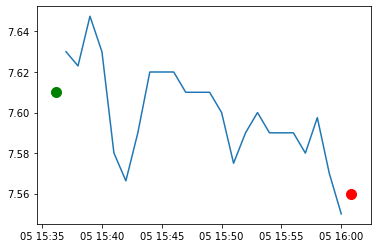

buy time:2020-02-05T15:36:11.232896921Z sell time:2020-02-05T16:00:50.854050289Z
{'rsi': 64.86143288349122, 'macd1': [0.0022084950400067527, 0.0054026421389865575, 0.009837912462813847, 0.014796167987603859, 0.020474616982950167], 'macd2': [0.05555952364018513, 0.05484814938173699, 0.054505780422834604, 0.054423487701471984, 0.05465417562523811], 'macd_signal': [0.0056626701721322285, 0.0056106645655030945, 0.006456114144965245, 0.008124124913492969, 0.010594223327384408]}
{'rsi': 43.94381676625228, 'macd': [0.003989197699922897, 0.0028399642829910476, 0.002816665980407862, 0.0013333599526754725, -0.0003592598085795373], 'too_close': 1, 'macd_signal': [0.007581956727401665, 0.006633558238519541, 0.005870179786897205, 0.004962815820052859, 0.003898400694326379], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0042576605029059165}
CDEV analysis


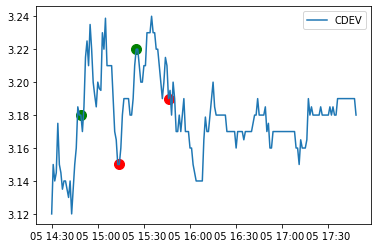

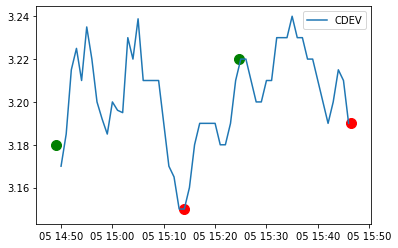

Delta = -0.0600000000000005


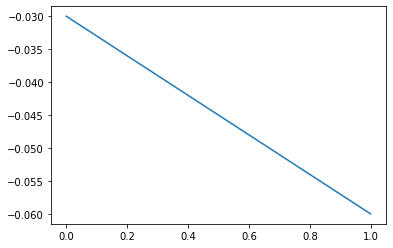

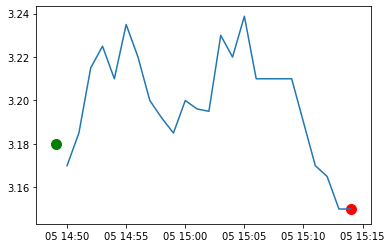

buy time:2020-02-05T14:49:05.521190024Z sell time:2020-02-05T15:14:01.807146079Z
{'rsi': 74.44556869103518, 'macd1': [0.045294513182301266, 0.04519555735216718, 0.04659728076329106, 0.04676561356957576, 0.047066551083677854], 'macd2': [0.019789191163201103, 0.020967586441102082, 0.022418053129900528, 0.02363670632398529, 0.02486084633769714], 'macd_signal': [0.047676766352819026, 0.04718052455268866, 0.04706387579480914, 0.04700422334976247, 0.04701668889654555]}
{'rsi': 41.05828805875354, 'macd': [0.009850937582998043, 0.007106906876280572, 0.004616663379146235, 0.0018370364543773832, -0.0003475694149797093], 'too_close': 1, 'macd_signal': [0.01443505239498585, 0.012969423291244795, 0.011298871308825082, 0.009406504337935542, 0.007455689587352492], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007803259002332201}


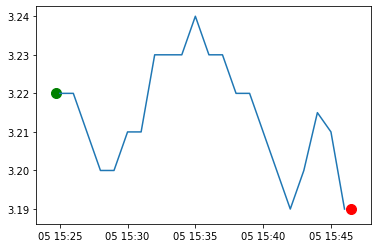

buy time:2020-02-05T15:24:44.865882786Z sell time:2020-02-05T15:46:29.685009925Z
{'rsi': 63.05246455541022, 'macd1': [0.0032790037980166, 0.002685431010028161, 0.0021897779025157327, 0.0025742117595641822, 0.00523923302352447], 'macd2': [0.02532338877060747, 0.02472287635383319, 0.024130844935834617, 0.023707499205104288, 0.023759898835959525], 'macd_signal': [0.005917881656397304, 0.005271391527123475, 0.0046550688022019265, 0.004238897393674378, 0.004438964519644396]}
{'rsi': 43.0549514235992, 'macd': [0.0019920899477292586, 0.0011796074384999855, 0.0013104053866523913, 0.0011355673542174927, -5.4378740591776165e-05], 'too_close': 1, 'macd_signal': [0.004823130786287765, 0.004094426116730209, 0.0035376219707146453, 0.0030572110474152148, 0.0024348930898138166], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0024892718304055927}
UCO analysis


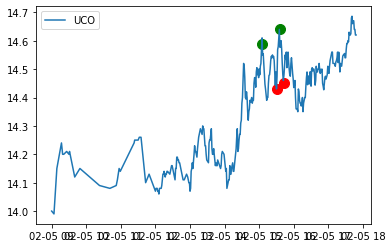

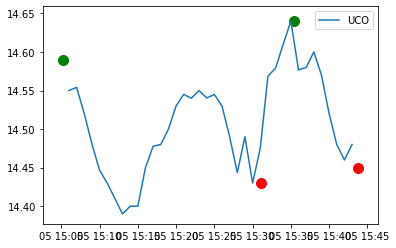

Delta = -0.3500000000000014


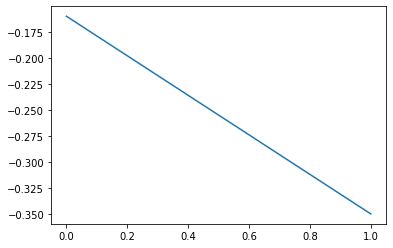

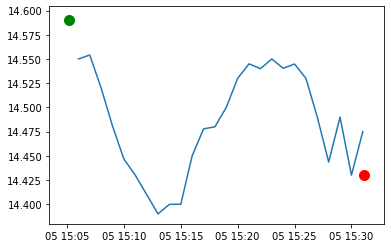

buy time:2020-02-05T15:05:10.960729157Z sell time:2020-02-05T15:31:05.650549845Z
{'rsi': 69.82137692306392, 'macd1': [0.098266215332794, 0.09482060406077153, 0.09180628635123078, 0.0923870199252228, 0.09338460868062626], 'macd2': [0.12767055033548402, 0.12763428421631318, 0.1275503236097233, 0.12806875837573628, 0.12866077891276007], 'macd_signal': [0.11861215715579358, 0.11385384653678918, 0.1094443344996775, 0.10603287158478655, 0.1035032190039545]}
{'rsi': 42.25839103325363, 'macd': [0.013784012002057366, 0.009056578873197552, 0.00766563644975804, 0.0033653483737055012, -2.9231274824681464e-05], 'too_close': 1, 'macd_signal': [0.014518197465980907, 0.013425873747424235, 0.012273826287890996, 0.010492130705053896, 0.008387858309078181], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.008417089583902863}


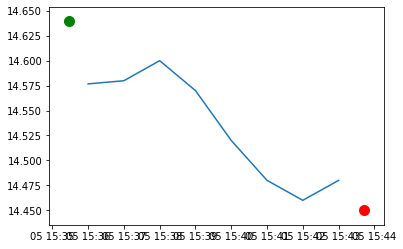

buy time:2020-02-05T15:35:27.157012926Z sell time:2020-02-05T15:43:43.084971099Z
{'rsi': 65.61082300209739, 'macd1': [0.008937069572784395, 0.014795700762222808, 0.020046814078595432, 0.026405414949500994, 0.033479470732125094], 'macd2': [0.08138450403937547, 0.08081061211577278, 0.08031970137420075, 0.08023538933027474, 0.08050930233691567], 'macd_signal': [0.020223031473579574, 0.01913756533130822, 0.01931941508076566, 0.020736615054512728, 0.023285186190035202]}
{'rsi': 41.425350694755195, 'macd': [0.018662954069675664, 0.014902423996661085, 0.00970068077097963, 0.00448243045524066, -0.00016143252397426977], 'too_close': 1, 'macd_signal': [0.01603478969198533, 0.015808316552920483, 0.014586789396532313, 0.012565917608273983, 0.010020447581824332], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.010181880105798602}
CLVS analysis


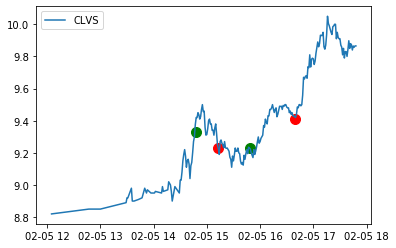

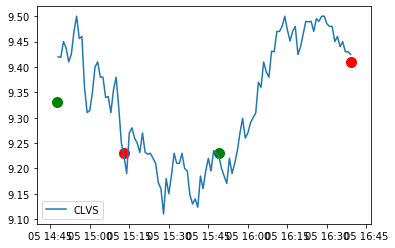

Delta = 0.08000000000000007


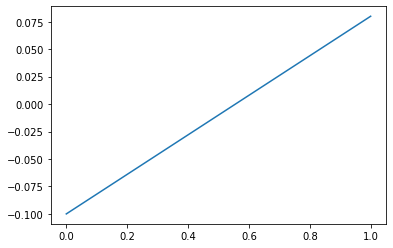

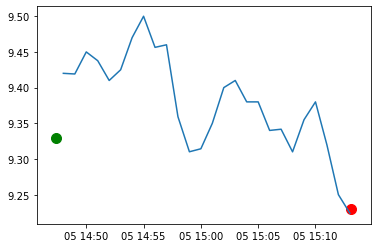

buy time:2020-02-05T14:47:24.144570548Z sell time:2020-02-05T15:13:07.317316986Z
{'rsi': 69.93075822101025, 'macd1': [0.07786053476867139, 0.07614575219153075, 0.0787208284950065, 0.08777057969009583, 0.09789707330801356], 'macd2': [0.061534336021560776, 0.06247432492862792, 0.06419884199198123, 0.06727253987075343, 0.07080212350112802], 'macd_signal': [0.07965665503011558, 0.07895447446239862, 0.07890774526892019, 0.08068031215315533, 0.08412366438412697]}
{'rsi': 41.51978779713826, 'macd': [0.016328570534721365, 0.015964594151565592, 0.012335981461422563, 0.005732699086488324, -4.3010544453991884e-05], 'too_close': 1, 'macd_signal': [0.03060270394008153, 0.027675081982378343, 0.024607261878187188, 0.020832349319847416, 0.016657277346987135], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.016700287891441127}


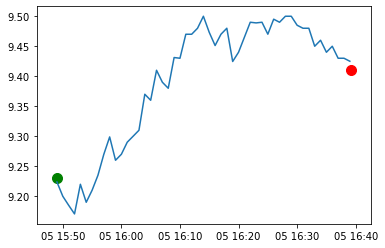

buy time:2020-02-05T15:48:56.545906832Z sell time:2020-02-05T16:39:14.517067777Z
{'rsi': 54.571572422229245, 'macd1': [-0.02472921926189109, -0.020913421982976743, -0.015691205630744776, -0.01341521041881677, -0.008288260205267406], 'macd2': [0.014994605317037113, 0.014347570406126664, 0.014129170721348672, 0.013505798327281937, 0.013550419250089263], 'macd_signal': [-0.02513777739397067, -0.024292906311771882, -0.02257256617556646, -0.020741095024216522, -0.0182505280604267]}
{'rsi': 40.16559367427881, 'macd': [0.009501353368847276, 0.007704895807446377, 0.0051660341257395714, 0.003120608995503815, -7.219771631028493e-05], 'too_close': 1, 'macd_signal': [0.01727422108947577, 0.015360356033069891, 0.013321491651603828, 0.011281315120383825, 0.009010612553045003], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.009082810269355288}
RIG analysis


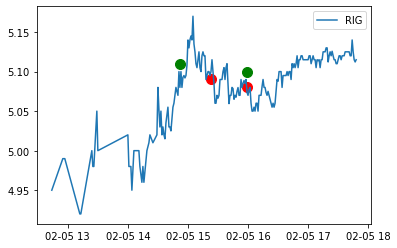

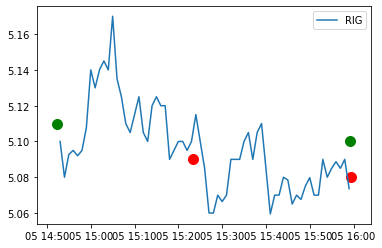

Delta = -0.040000000000000036


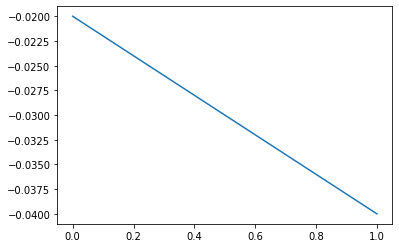

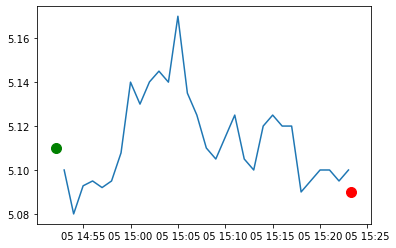

buy time:2020-02-05T14:52:11.239262586Z sell time:2020-02-05T15:23:17.64457046Z
{'rsi': 67.42992036390739, 'macd1': [0.05293070912467712, 0.051751813586895956, 0.04983955282553598, 0.05016653310851016, 0.05064873665661196], 'macd2': [0.030791747450295226, 0.03177419992054897, 0.032547301213780244, 0.03368633234967433, 0.034840336873582345], 'macd_signal': [0.05485297923722404, 0.054232746107158426, 0.05335410745083394, 0.05271659258236918, 0.052303021397217736]}
{'rsi': 45.326767263678775, 'macd': [0.003329343493487791, 0.002447279329251373, 0.00172817375544021, 0.0008856476751271103, -4.2108331286705436e-05], 'too_close': 0, 'macd_signal': [0.008052599997511048, 0.0069315358638591135, 0.0058908634421753325, 0.004889820288765688, 0.0039034345647552095], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.003945542896041915}


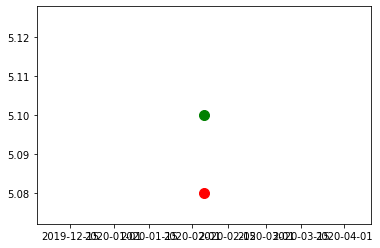

buy time:2020-02-05T15:59:13.499442563Z sell time:2020-02-05T15:59:28.012661504Z
{'rsi': 59.31788861028509, 'macd1': [-0.002400724683200295, -0.0014265980008127954, -0.0009422925032076535, -0.00015325209906347226, 0.0016632696090157495], 'macd2': [0.010161265951951215, 0.009961226752603025, 0.009702076370871282, 0.009528100627629321, 0.009592702551775467], 'macd_signal': [-0.004035174070083224, -0.003513458856229138, -0.002999225585624841, -0.0024300308883125673, -0.001611370788846904]}
{'rsi': 48.7652441130165, 'macd': [-0.0014136122807641982, -0.0007691857865790297, -0.0004492536380382717, 6.561886261735594e-05, -5.351449872392777e-05], 'too_close': 0, 'macd_signal': [-0.0025947888696977927, -0.00222966825307404, -0.0018735853300668865, -0.001485744491530038, -0.001199298492968816], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0011457839942448883}
SVRA analysis


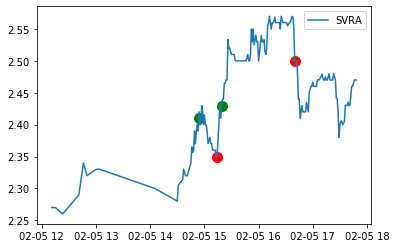

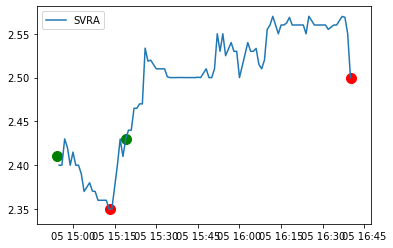

Delta = 0.009999999999999787


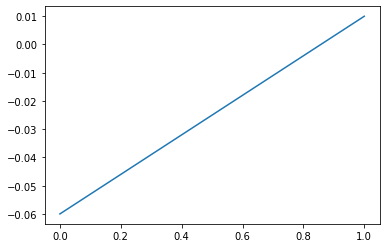

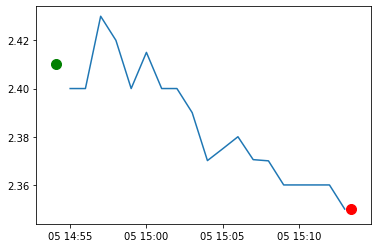

buy time:2020-02-05T14:54:04.987904362Z sell time:2020-02-05T15:13:25.636823914Z
{'rsi': 70.37866324216814, 'macd1': [0.028812676317009345, 0.02958913930640783, 0.031455722682074416, 0.033357396578313825, 0.03532870921407616], 'macd2': [-0.005998515202039645, -0.0046752103880063345, -0.003130378233411335, -0.0015441406081984077, 9.044929106094557e-05], 'macd_signal': [0.017423704218866073, 0.019856791236374426, 0.022176577525514423, 0.024412741336074302, 0.026595934911674675]}
{'rsi': 42.723752966024676, 'macd': [0.004576894181803848, 0.003141402794127668, 0.0019820406375727906, 0.0010529007670418977, -0.0002042588822943614], 'too_close': 0, 'macd_signal': [0.010687528691011514, 0.009178303511634744, 0.007739050936822353, 0.006401820902866262, 0.005080604945834137], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005284863828128499}


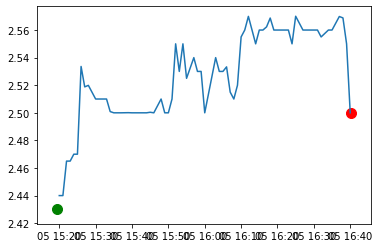

buy time:2020-02-05T15:19:15.676737512Z sell time:2020-02-05T16:40:17.035324937Z
{'rsi': 63.769708433883, 'macd1': [0.000368939991277184, 0.0030863191942707147, 0.007565333450812339, 0.009400853640971096, 0.012327248620258136], 'macd2': [0.007951856842494553, 0.008391118439182943, 0.00926004145406667, 0.009726395588984804, 0.010459772351116836], 'macd_signal': [0.008261157332140612, 0.0072261897045666325, 0.007294018453815774, 0.007715385491246838, 0.008637758117049098]}
{'rsi': 32.66488208527, 'macd': [0.003686641557334447, 0.0039428450656244785, 0.004039330330972479, 0.003085431442529707, -3.559926849794337e-05], 'too_close': 1, 'macd_signal': [0.005027008350837325, 0.004810175693794756, 0.004656006621230301, 0.004341891585490182, 0.003466393414692557], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0035019926831905005}
PRTY analysis


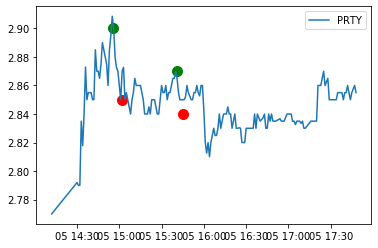

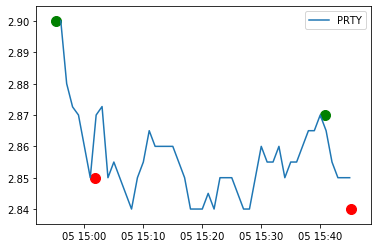

Delta = -0.08000000000000007


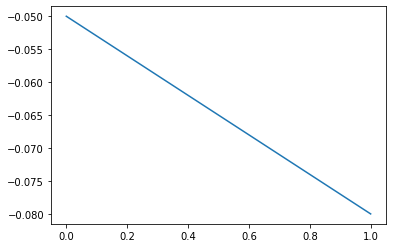

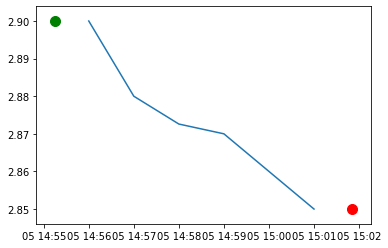

buy time:2020-02-05T14:55:15.523498412Z sell time:2020-02-05T15:01:50.238504524Z
{'rsi': 67.47572410364843, 'macd1': [0.026582012328927096, 0.023950729333607423, 0.02361054203717572, 0.023872668320175094, 0.024204845113747986], 'macd2': [0.018389716115432275, 0.01839956214349714, 0.018779033339819673, 0.01925806056468149, 0.019747948370418378], 'macd_signal': [0.027886581324313653, 0.027099410926172407, 0.02640163714837307, 0.025895843382733475, 0.025557643728936378]}
{'rsi': 46.77307291189658, 'macd': [0.012980229293495515, 0.01139150087385632, 0.009870524171879502, 0.008037678375899304, 0.005985620893630195], 'too_close': 1, 'macd_signal': [0.014585570210003448, 0.013946756342774022, 0.013131509908595119, 0.012112743602055956, 0.010887319060370803], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004901698166740609}


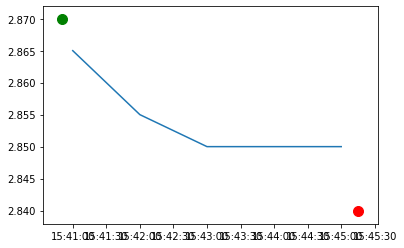

buy time:2020-02-05T15:40:50.793395878Z sell time:2020-02-05T15:45:14.775645188Z
{'rsi': 61.30670093384627, 'macd1': [0.0003461456787712258, 0.0009036442932321975, 0.001728993415180291, 0.002355930836476894, 0.0032191333080171525], 'macd2': [0.007247938974387136, 0.007167213429574382, 0.007161448402652315, 0.007144690657526986, 0.007197814074495046], 'macd_signal': [-0.0007460998599035321, -0.0004161510292763862, 1.287785961494927e-05, 0.0004814884549873382, 0.0010290174255933012]}
{'rsi': 42.41833230248815, 'macd': [0.002201863299453155, 0.001769169955413652, 0.0011492898177802857, 0.0006513404921206778, -4.871196602529437e-06], 'too_close': 1, 'macd_signal': [0.0009126616345569808, 0.001083963298728315, 0.0010970286025387091, 0.001007890980455103, 0.0008053385450435765], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.000810209741646106}
GLOG analysis


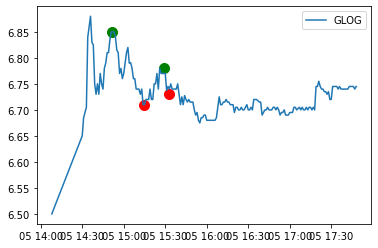

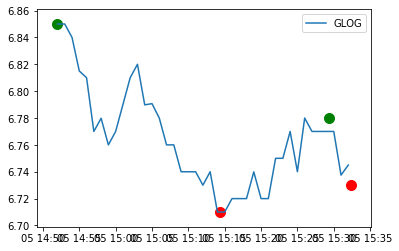

Delta = -0.1899999999999995


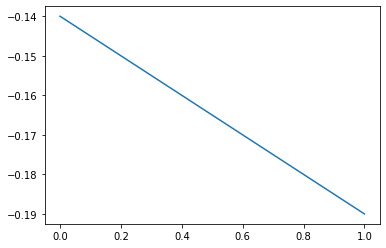

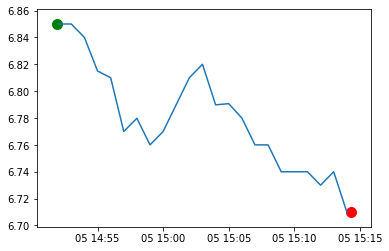

buy time:2020-02-05T14:51:52.487992655Z sell time:2020-02-05T15:14:20.561939678Z
{'rsi': 69.48930682057454, 'macd1': [0.05571430041236525, 0.055991250117747526, 0.05557015658073716, 0.05660126384854092, 0.057960663971766024], 'macd2': [0.030240554594471725, 0.031614205164187226, 0.032827445124306465, 0.03429100184871192, 0.03582258122314652], 'macd_signal': [0.0598101351738462, 0.05904635816262647, 0.05835111784624861, 0.05800114704670707, 0.05799305043171886]}
{'rsi': 37.60250336963191, 'macd': [-0.0014210100615379417, -0.0029908710957275986, -0.004694777471775602, -0.005442045070361168, -0.007512097159254161], 'too_close': 1, 'macd_signal': [0.006250096637280186, 0.004401903090678629, 0.0025825669781877826, 0.0009776445684779925, -0.0007203037770684381], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006791793382185723}


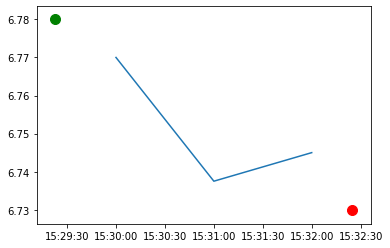

buy time:2020-02-05T15:29:22.616693148Z sell time:2020-02-05T15:32:24.623968118Z
{'rsi': 59.25942820168621, 'macd1': [-0.004704248012415313, -0.004484447421714499, -0.001070250976901832, 0.0008191650522473282, 0.0039653552169385264], 'macd2': [0.01782987071386888, 0.017232877441118788, 0.017295807057127632, 0.017166106064807174, 0.017355187869050326], 'macd_signal': [-0.008197944116969499, -0.0074552447779184985, -0.006178246017715165, -0.004778763803722667, -0.003029939999590428]}
{'rsi': 43.955766616775875, 'macd': [0.001269766542276507, 0.002029578704313195, 0.0025952819642851566, 0.001314073050441955, -9.094783113106075e-05], 'too_close': 1, 'macd_signal': [-0.0027741677227959317, -0.0018134184373741064, -0.0009316783570422537, -0.0004825280755454119, -0.0004042120266625417], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.00031326419553148093}
AA analysis


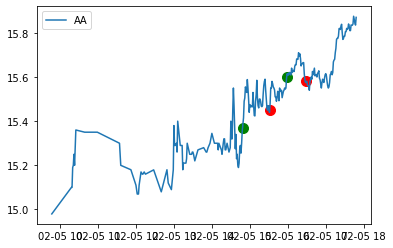

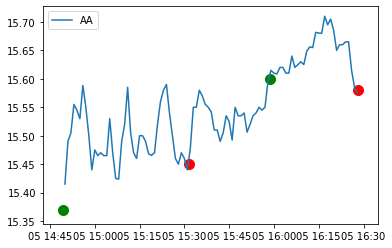

Delta = 0.0600000000000005


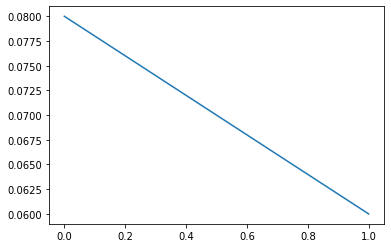

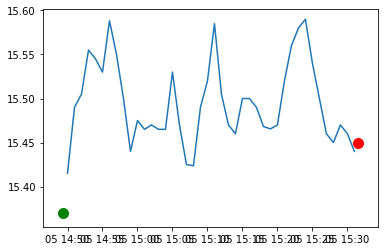

buy time:2020-02-05T14:49:20.356977838Z sell time:2020-02-05T15:31:27.874699868Z
{'rsi': 56.3952640850663, 'macd1': [0.11230701833869361, 0.10605765223335162, 0.10351860298006876, 0.10488865153683946, 0.10660149696978927], 'macd2': [0.07242077578540673, 0.07360819849330547, 0.07529785337411532, 0.07764199750336154, 0.08004236041874968], 'macd_signal': [0.13272752757277959, 0.12739355250489398, 0.12261856259992894, 0.11907258038731104, 0.11657836370380668]}
{'rsi': 45.12067251034376, 'macd': [0.011387514907681862, 0.007165281000498069, 0.004821134046840925, 0.0024124333810462417, -1.5287051795098705e-05], 'too_close': 1, 'macd_signal': [0.01585624719449181, 0.014118053955693061, 0.012258669973922633, 0.010289422655347356, 0.008228480713918865], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.008243767765713964}


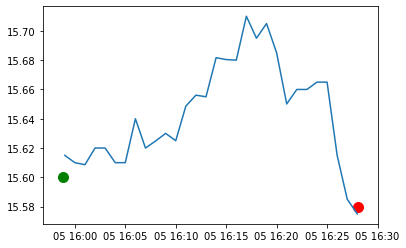

buy time:2020-02-05T15:58:49.315958151Z sell time:2020-02-05T16:28:01.666007798Z
{'rsi': 63.37100820824079, 'macd1': [0.007320598092764641, 0.008548336345784335, 0.009013962198197945, 0.009674905960650904, 0.014071088042793889], 'macd2': [0.04493504599012965, 0.044226361543417525, 0.04342364728589665, 0.042695642449551485, 0.0427572491275896], 'macd_signal': [0.008240559906929519, 0.008302115194700482, 0.008444484595399974, 0.00869056886845016, 0.009766672703318905]}
{'rsi': 36.48941312254875, 'macd': [0.012676560087921729, 0.011517101163713406, 0.007866651337529618, 0.0033615391179395715, -0.00045233454820881036], 'too_close': 1, 'macd_signal': [0.016643494777222222, 0.015618216054520458, 0.01406790311112229, 0.011926630312485746, 0.009450837340346834], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.009903171888555645}
MGI analysis


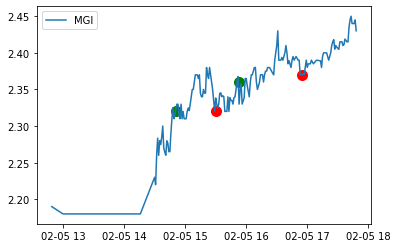

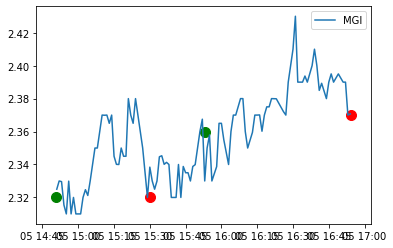

Delta = 0.010000000000000231


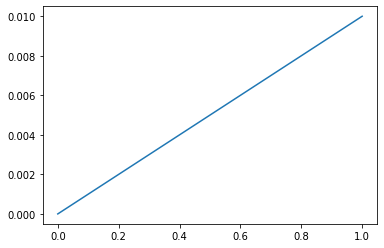

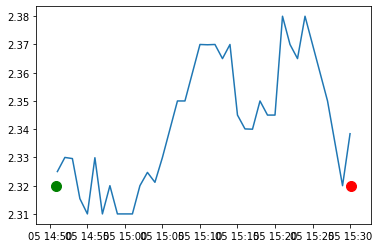

buy time:2020-02-05T14:50:52.793356374Z sell time:2020-02-05T15:30:08.668838945Z
{'rsi': 65.2705815915358, 'macd1': [0.024562839844436635, 0.026158045730889423, 0.028306334721917903, 0.028470306612645047, 0.02907204747731562], 'macd2': [0.011674976174028462, 0.012617740958766, 0.013704838442111011, 0.014443179887696278, 0.015259313812822306], 'macd_signal': [0.024693968157171668, 0.02498678367191522, 0.025650693881915758, 0.026214616428061617, 0.026786102637912416]}
{'rsi': 40.52085944253192, 'macd': [0.006866178312111337, 0.005674929498667769, 0.00389376250768958, 0.0016760510535807072, -7.380269057621902e-05], 'too_close': 1, 'macd_signal': [0.007658427612926814, 0.007261727990075005, 0.00658813489359792, 0.0056057181255944775, 0.0044698139623603386], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004543616652936558}


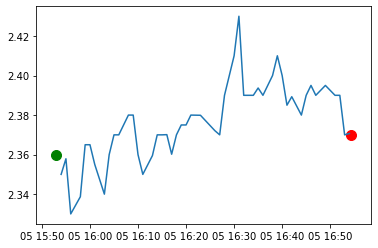

buy time:2020-02-05T15:53:00.9635162Z sell time:2020-02-05T16:54:21.435050522Z
{'rsi': 62.220248221579375, 'macd1': [-0.0021602371677560406, -0.0015190290700419773, -0.00019364917502295853, 0.0016526587105332169, 0.003670675900521392], 'macd2': [0.010093219884739657, 0.009869061401907242, 0.009808579628774794, 0.009898782396270178, 0.010084292767490677], 'macd_signal': [-0.002576157790742449, -0.0023647320466023544, -0.0019305154722864752, -0.0012138806357225368, -0.0002369693284737511]}
{'rsi': 42.237556897352086, 'macd': [0.0021013220754473316, 0.001808889602131103, 0.001557528069648928, 0.00030247326421317666, -0.0006794197434540905], 'too_close': 1, 'macd_signal': [0.0032018028723502998, 0.0029232202183064604, 0.002650081788574954, 0.0021805600837025985, 0.0016085641182712607], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002287983861725351}
NBR analysis


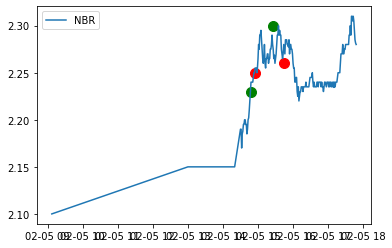

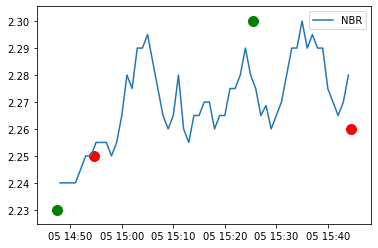

Delta = -0.020000000000000018


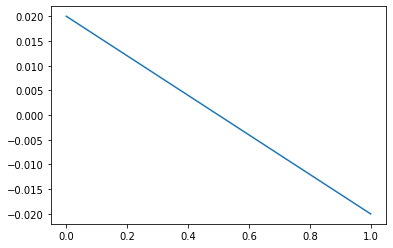

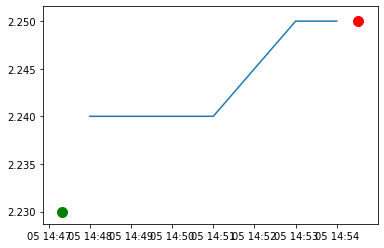

buy time:2020-02-05T14:47:19.616818658Z sell time:2020-02-05T14:54:30.642233089Z
{'rsi': 74.45142079501036, 'macd1': [0.034361898390644185, 0.03360219651962426, 0.03326223412472684, 0.0334145458196109, 0.03395080659686078], 'macd2': [0.015643549154019887, 0.01636647542383507, 0.017133363646606004, 0.017971458946889562, 0.018873726619886178], 'macd_signal': [0.033590019336235434, 0.0335924547729132, 0.033526410643275925, 0.03350403767854292, 0.03359339146220649]}
{'rsi': 78.8212989312842, 'macd': [0.020896440717864895, 0.020696423671573427, 0.020271781509896947, 0.01993736188378703, 0.01967758864417135], 'too_close': 1, 'macd_signal': [0.020646698416677378, 0.02065664346765659, 0.02057967107610466, 0.020451209237641134, 0.020296485118947178], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.000618896474775827}


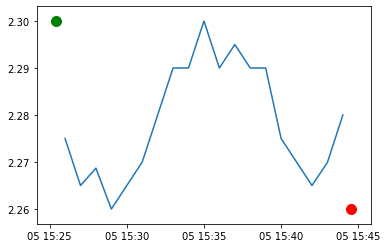

buy time:2020-02-05T15:25:26.173354017Z sell time:2020-02-05T15:44:33.210208799Z
{'rsi': 69.37607641830384, 'macd1': [0.007904689130408205, 0.00793387686338587, 0.008265190593059302, 0.009228297468523827, 0.010675423396952599], 'macd2': [0.0239664622435507, 0.02368742599685625, 0.02347278700939892, 0.023397706858188982, 0.023451145380632976], 'macd_signal': [0.011063812102718666, 0.010437825054852107, 0.010003298162493545, 0.009848298023699601, 0.010013723098350202]}
{'rsi': 41.93368744233758, 'macd': [0.0035571870543682493, 0.0025336218684106626, 0.0014433941667761907, 0.0008296661633364621, -0.0001736240492573593], 'too_close': 1, 'macd_signal': [0.003833224443881719, 0.0035733039287875077, 0.003147321976385244, 0.0026837908137754877, 0.0021123078411689183], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0022859318904262776}
UWT analysis


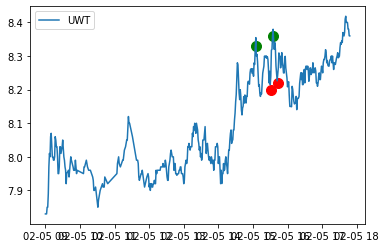

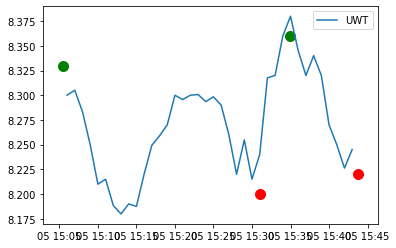

Delta = -0.2699999999999996


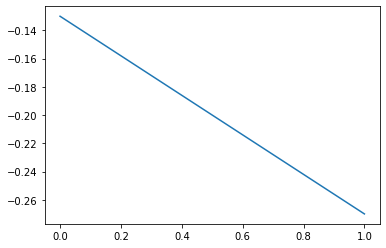

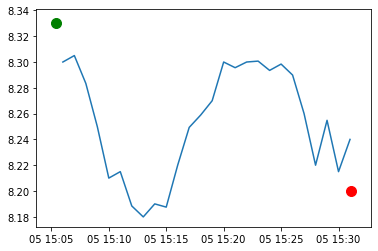

buy time:2020-02-05T15:05:26.182283883Z sell time:2020-02-05T15:31:05.837497951Z
{'rsi': 72.0035499897564, 'macd1': [0.07989715917188178, 0.07783197736114111, 0.07494407734006359, 0.07581601803762261, 0.07677590299397075], 'macd2': [0.10416181477267905, 0.10427317199858965, 0.10413208454910095, 0.10463541499313411, 0.10515985389427396], 'macd_signal': [0.09660319539156811, 0.09284895178548272, 0.0892679768963989, 0.08657758512464364, 0.08461724869850906]}
{'rsi': 39.22714640799019, 'macd': [0.011293176979780384, 0.0074649690649337685, 0.006192794468105944, 0.003053531217744876, -0.0007310054866618287], 'too_close': 1, 'macd_signal': [0.012109345776489821, 0.011180470434178611, 0.010182935240964077, 0.008757054436320237, 0.006859442451723824], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007590447938385652}


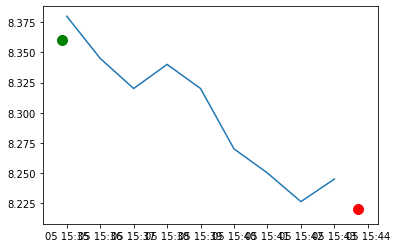

buy time:2020-02-05T15:34:52.300730427Z sell time:2020-02-05T15:43:42.170554839Z
{'rsi': 64.49134759785173, 'macd1': [0.009403172451207809, 0.007335042169708927, 0.011813458135261357, 0.015386992488497953, 0.02120230296481118], 'macd2': [0.06865121027324861, 0.06683732054928626, 0.06630109122620098, 0.06574168777265399, 0.06576161816141735], 'macd_signal': [0.019178276476074778, 0.01680962961480161, 0.01581039531889356, 0.015725714752814438, 0.016821032395213785]}
{'rsi': 40.872616407797, 'macd': [0.014872512803741245, 0.011291722369401569, 0.007315889272911491, 0.0028916571292452176, -0.0009206232051610641], 'too_close': 1, 'macd_signal': [0.013001849082292318, 0.012659823739714169, 0.011591036846353634, 0.00985116090293195, 0.007696804081313348], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.008617427286474412}
MCFT analysis


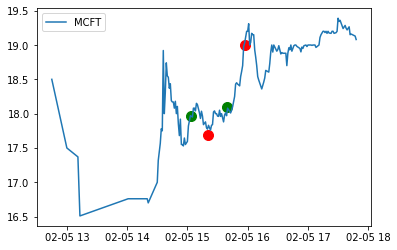

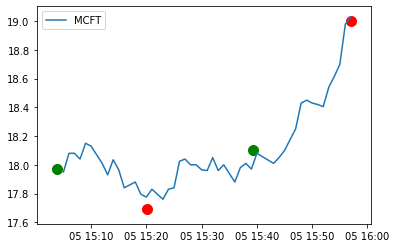

Delta = 0.620000000000001


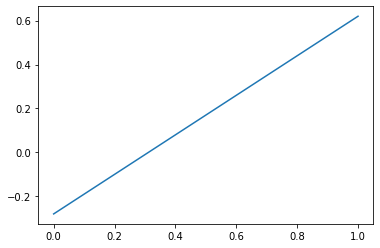

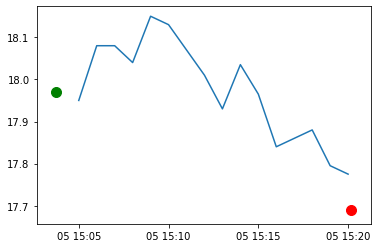

buy time:2020-02-05T15:03:44.643431065Z sell time:2020-02-05T15:20:10.633940355Z
{'rsi': 53.9489500820304, 'macd1': [-0.02614869563672073, -0.04410625875646801, -0.05408319557386321, -0.04333483330174914, -0.02245409552955735], 'macd2': [0.10946180584505072, 0.10271430171208706, 0.09706181701924521, 0.09530467405790688, 0.09593466020334063], 'macd_signal': [0.07564457852827722, 0.051694411071328175, 0.030538889742289896, 0.015764145133482087, 0.008120497000874199]}
{'rsi': 43.526121286610966, 'macd': [0.028666186091420798, 0.01903223331989423, 0.013356007350914467, 0.004343935071830174, -0.007768639886833739], 'too_close': 1, 'macd_signal': [0.024720398765584923, 0.023582765676446786, 0.021537414011340322, 0.018098718223438292, 0.012925246601383885], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.020693886488217624}


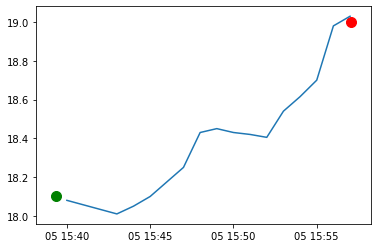

buy time:2020-02-05T15:39:21.953867324Z sell time:2020-02-05T15:57:03.862884717Z
{'rsi': 57.55863543373806, 'macd1': [0.028324646994523306, 0.019402970064401615, 0.0201691437508984, 0.022932736881333682, 0.032016090623056215], 'macd2': [0.0693893783843258, 0.06677422792513354, 0.06586077006095792, 0.06539483258566037, 0.06630098953847963], 'macd_signal': [0.02096550978111263, 0.020653001837770427, 0.020556230220396023, 0.021031531552583554, 0.023228443366678085]}
{'rsi': 79.34121395767099, 'macd': [0.08041701255922362, 0.08826279728062758, 0.09712622956638484, 0.10718700498949119, 0.12350466109854352], 'too_close': 0, 'macd_signal': [0.054900723307993005, 0.06157313810251992, 0.06868375639529291, 0.07638440611413257, 0.08580845711101476], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.037696203987528765}
GLNG analysis


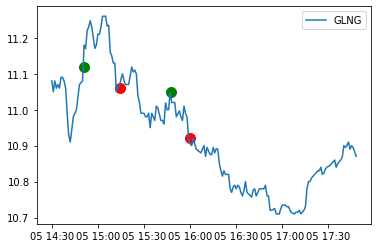

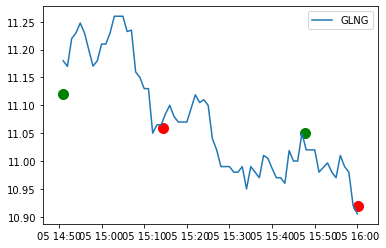

Delta = -0.1899999999999995


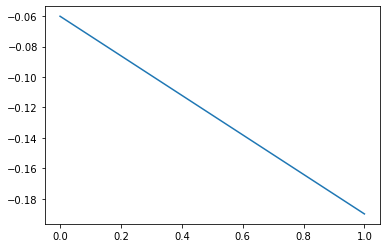

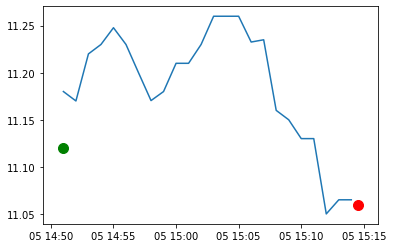

buy time:2020-02-05T14:50:57.564566453Z sell time:2020-02-05T15:14:30.741588554Z
{'rsi': 68.4770613108745, 'macd1': [0.08771630366589811, 0.0838787113514865, 0.08272414516382653, 0.0836529135904307, 0.08741587559315], 'macd2': [0.03555516778310519, 0.03720749714037552, 0.039231159620392475, 0.04158682644487577, 0.04448728308516259], 'macd_signal': [0.09993019753518491, 0.09671990029844522, 0.09392074927152148, 0.09186718213530333, 0.09097692082687267]}
{'rsi': 40.68251441319312, 'macd': [0.022754639203320437, 0.0176411523508051, 0.009271667110523296, 0.003408799817959718, -0.0014636785894666104], 'too_close': 0, 'macd_signal': [0.03857418050143674, 0.03438757487131041, 0.029364393319152988, 0.024173274618914335, 0.019045883977238144], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.020509562566704755}


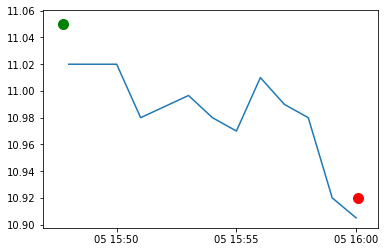

buy time:2020-02-05T15:47:44.921963833Z sell time:2020-02-05T16:00:03.397861051Z
{'rsi': 56.19099875063473, 'macd1': [-0.028869925016136833, -0.024089590312309284, -0.021569503688942504, -0.019349270537427188, -0.013400663133392499], 'macd2': [0.010799074059676173, 0.010341744166222355, 0.009603766132833869, 0.008909442854401206, 0.009056073947927956], 'macd_signal': [-0.029866147895586122, -0.028710836378930755, -0.027282569840933104, -0.02569590998023192, -0.023236860610864035]}
{'rsi': 36.52055175860626, 'macd': [-0.006420203994881746, -0.005102442777657146, -0.005048311403486494, -0.0054600491456451294, -0.008826857137643529], 'too_close': 1, 'macd_signal': [-0.006999871001763658, -0.006620385356942355, -0.006305970566251183, -0.006136786282129972, -0.006674800453232684], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002152056684410845}
TEDU analysis


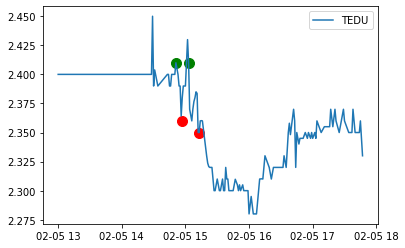

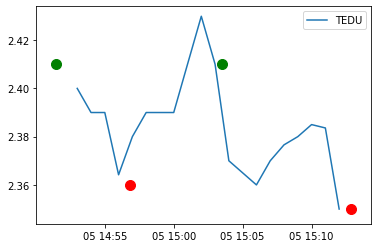

Delta = -0.11000000000000032


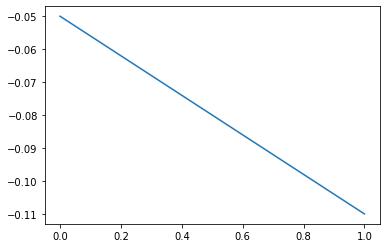

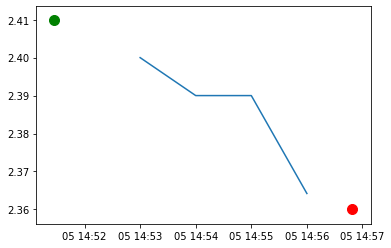

buy time:2020-02-05T14:51:27.456166332Z sell time:2020-02-05T14:56:48.524644038Z
{'rsi': 65.6584777034645, 'macd1': [0.030321202188987595, 0.031848687758611494, 0.03268248770337534, 0.03296329976604362, 0.033605379874789065], 'macd2': [0.0016338258969015307, 0.0029795711393969526, 0.004212934401461865, 0.005340930054562598, 0.006530116091175042], 'macd_signal': [0.017639823746254363, 0.020481596548725788, 0.0229217747796557, 0.024930079776933282, 0.02666513979650444]}
{'rsi': 49.13436250768923, 'macd': [0.02117960786887929, 0.02060381521945498, 0.019368083087183408, 0.018153641385579622, 0.015631301859841962], 'too_close': 1, 'macd_signal': [0.01712417975137251, 0.017820106844989005, 0.018129702093427884, 0.01813448995185823, 0.017633852333454977], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0020025504736130156}


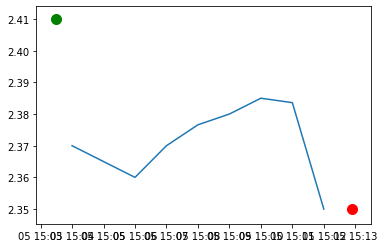

buy time:2020-02-05T15:03:29.017798539Z sell time:2020-02-05T15:12:52.928665234Z
{'rsi': 62.93242781988637, 'macd1': [0.023865936756394035, 0.022865625153263736, 0.02182132831145811, 0.022349912514470827, 0.02290820597820531], 'macd2': [0.00924085764813487, 0.00971997021846871, 0.010145223374592671, 0.01084011606501356, 0.01154207032986676], 'macd_signal': [0.027316020406605752, 0.02642594135593735, 0.025505018747041502, 0.024873997500527368, 0.024480839196062955]}
{'rsi': 42.30001626295528, 'macd': [0.005984174659259711, 0.005273837430660233, 0.004911576766418513, 0.004492781745367491, 0.002362645602400626], 'too_close': 1, 'macd_signal': [0.010618512053430071, 0.009549577128876104, 0.008621977056384586, 0.007796137994181167, 0.006709439515825059], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004346793913424433}
HLX analysis


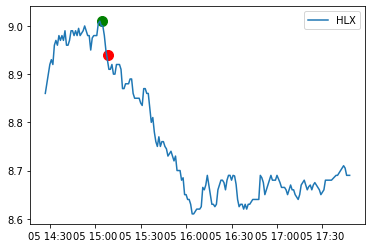

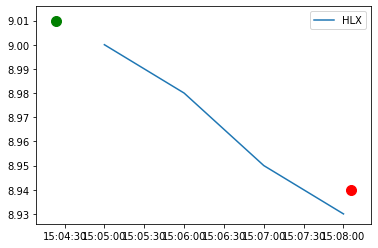

Delta = -0.07000000000000028


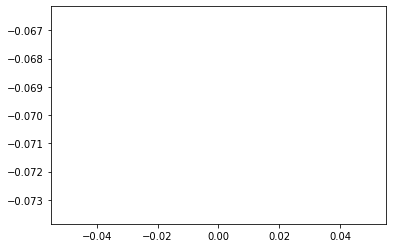

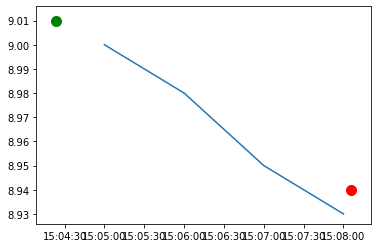

buy time:2020-02-05T15:04:23.27857576Z sell time:2020-02-05T15:08:05.833141228Z
{'rsi': 64.49349800542993, 'macd1': [0.03219264077148232, 0.030101841273651786, 0.028120709572799996, 0.028242378928853284, 0.02841471384964933], 'macd2': [0.045087143412613884, 0.04484531374029643, 0.04455109889384801, 0.04460899863105183, 0.044670890394659324], 'macd_signal': [0.044716140081319716, 0.04179328031978613, 0.039058766170388906, 0.03689548872208178, 0.03519933374759529]}
{'rsi': 44.683142356138994, 'macd': [0.014003971719665387, 0.01340672659132558, 0.011728266405718557, 0.008709618645431405, 0.005724833135525742], 'too_close': 1, 'macd_signal': [0.01774688870998471, 0.016878856286252884, 0.015848738310146018, 0.014420914377203095, 0.012681698128867625], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006956864993341883}
AMRS analysis


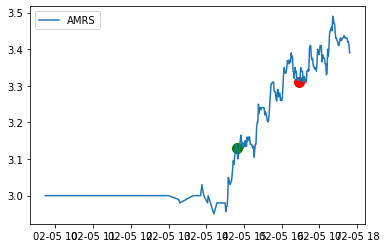

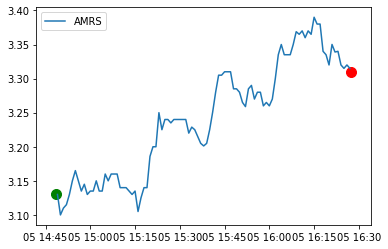

Delta = 0.18000000000000016


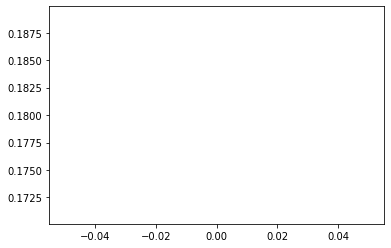

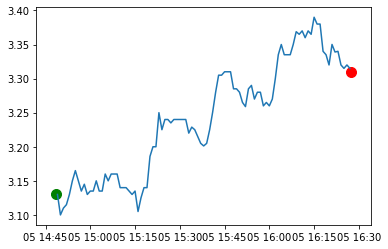

buy time:2020-02-05T14:48:40.116242558Z sell time:2020-02-05T16:27:24.457532638Z
{'rsi': 74.19861851498607, 'macd1': [0.03483459195500327, 0.037968379396906116, 0.03915333104629504, 0.04242754295340845, 0.04609676831706233], 'macd2': [0.020395574778247383, 0.021771666866640782, 0.022834962039742557, 0.024336482369669454, 0.025997278990894213], 'macd_signal': [0.027243056552800272, 0.029388121121621442, 0.03134116310655616, 0.033558439075926615, 0.036066104924153755]}
{'rsi': 45.21255708157066, 'macd': [0.006010798363442316, 0.004088470492403129, 0.002277715391691526, 0.0010968969315050536, -9.720702359494737e-05], 'too_close': 0, 'macd_signal': [0.010454747816324791, 0.00918149235154046, 0.007800736959570673, 0.006459968953957549, 0.00514853375844705], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005245740782041998}
ANF analysis


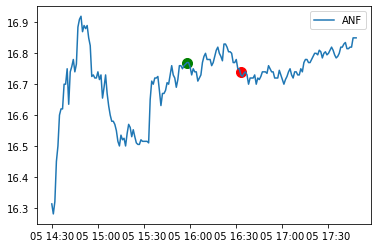

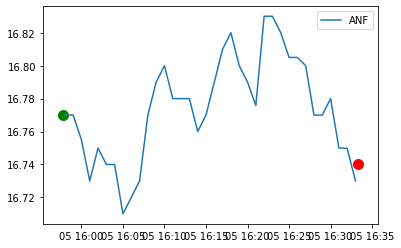

Delta = -0.030000000000001137


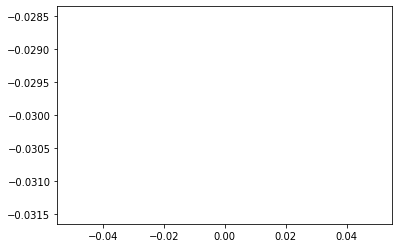

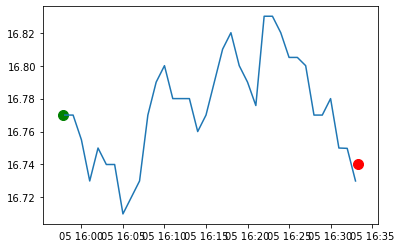

buy time:2020-02-05T15:57:46.5619534Z sell time:2020-02-05T16:33:15.462207857Z
{'rsi': 63.788886938033826, 'macd1': [0.03524909431323309, 0.036595201699729074, 0.03643508410567975, 0.03669214201227078, 0.0372731173862384], 'macd2': [0.028512555374266668, 0.0292968829631306, 0.029811697137510862, 0.030397599027434552, 0.03104796682135813], 'macd_signal': [0.033626560503326866, 0.03422028874260731, 0.0346632478152218, 0.035069026654631595, 0.035509844800952955]}
{'rsi': 40.782860556521, 'macd': [0.005856267785944169, 0.004679197762527565, 0.002142789981132154, 0.0001281502815864144, -0.0019524540334074914], 'too_close': 1, 'macd_signal': [0.010084082298255758, 0.009003105391110119, 0.007631042309114526, 0.006130463903608904, 0.004513880316205625], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006466334349613116}
NLS analysis


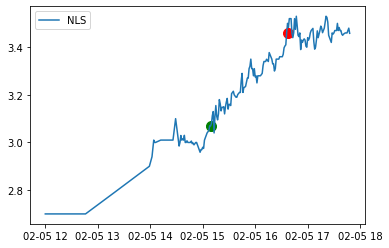

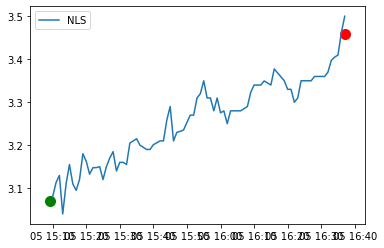

Delta = 0.3900000000000001


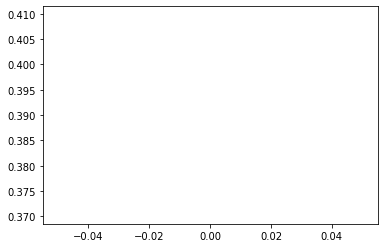

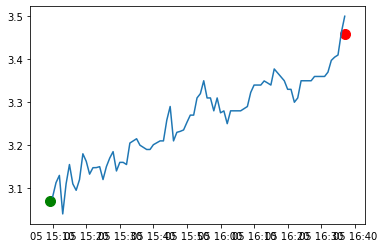

buy time:2020-02-05T15:09:13.988787788Z sell time:2020-02-05T16:37:00.206145Z
{'rsi': 69.82329825892903, 'macd1': [0.031172836468534193, 0.03207920328092184, 0.03322146556092953, 0.03453552899329004, 0.036766940183962316], 'macd2': [0.03845733049405897, 0.03891618535691643, 0.03943604153364877, 0.04001118943309967, 0.04079622364297686], 'macd_signal': [0.038961700940982336, 0.03758520140897024, 0.0367124542393621, 0.036277069190147684, 0.03637504338891061]}
{'rsi': 76.61428826180214, 'macd': [0.011955374746845937, 0.013454961049607306, 0.01484353529786775, 0.015992508279656814, 0.019402194911185333], 'too_close': 0, 'macd_signal': [0.012131565750876814, 0.012396244810622913, 0.01288570290807188, 0.013507063982388868, 0.014686090168148161], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 1, 'distance_macd_to_signal_macd': 0.004716104743037172}
CTRA analysis


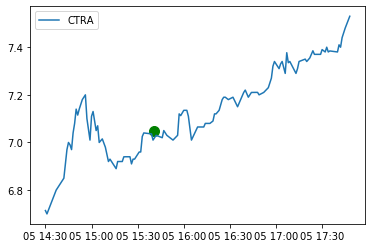

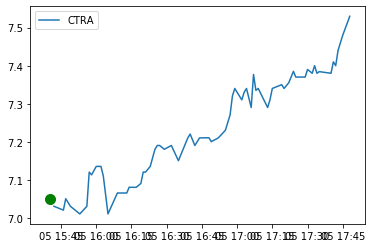

Delta = nan


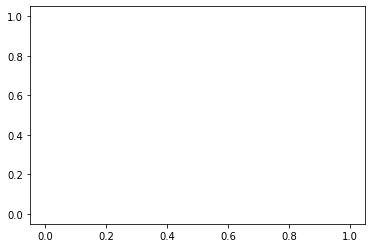

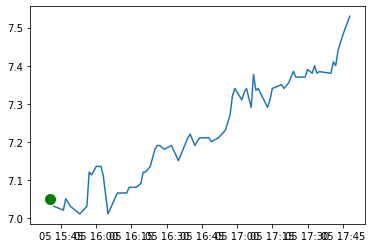

buy time:2020-02-05T15:40:24.902182754Z sell time:None
{'rsi': 63.91305038815682, 'macd1': [-0.004261298115043388, 0.002300216718049697, 0.00861137259334388, 0.013138786768080557, 0.017972073807910327], 'macd2': [0.028722630694443474, 0.029214892282068305, 0.02986096758954382, 0.030343644683563653, 0.03102707747628841], 'macd_signal': [-0.002093645526525518, -0.001214873077610475, 0.0007503760565803963, 0.0032280581988804284, 0.0061768613206864085]}
None
OVV analysis


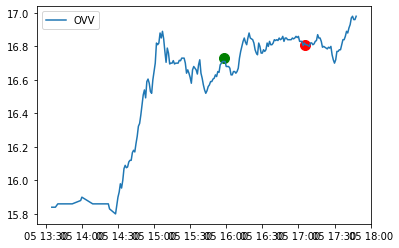

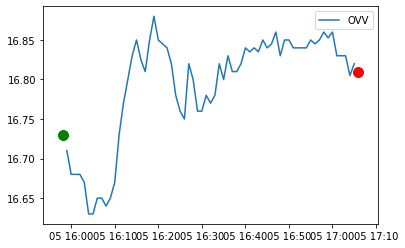

Delta = 0.0799999999999983


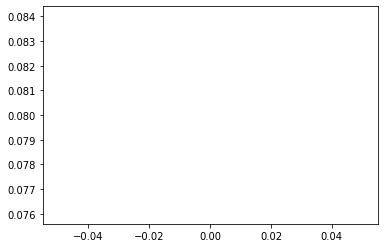

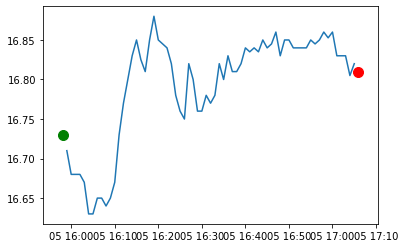

buy time:2020-02-05T15:58:05.562981094Z sell time:2020-02-05T17:05:46.815124836Z
{'rsi': 65.4810113550414, 'macd1': [-0.004545843280013173, 0.001690487242381522, 0.007354957170271348, 0.012506835806991745, 0.01799612151032548], 'macd2': [0.05125838358282664, 0.05086411877959662, 0.050579968524761654, 0.050397581635326816, 0.05046904802511776], 'macd_signal': [-0.01379156611791823, -0.01069515544585828, -0.007085132922632355, -0.003166739176707535, 0.001065832960699068]}
{'rsi': 42.96363203435891, 'macd': [0.005518797561283151, 0.004223425470776476, 0.003159194939591714, 0.0009901945913988186, -0.0004530549603245504], 'too_close': 1, 'macd_signal': [0.007272598530846922, 0.006662763918832833, 0.0059620501229846095, 0.004967679016667451, 0.003883532221269051], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0043365871815936015}
PHAS analysis


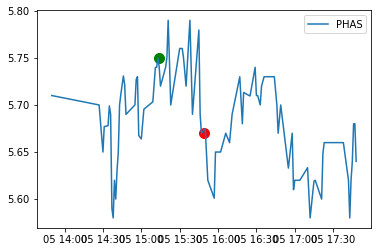

KeyError: 

In [28]:
for symbol in minute_history:
    print (f'{symbol} analysis')
    plt.plot(minute_history[symbol]['close'], label=symbol)


    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
   
    plt.legend()
    plt.show()
    
    min_time = trade_details[symbol][0][0]
    max_time = trade_details[symbol][-1][2]
    delta = 0 
    accumulative_delta = []
    plt.plot(minute_history[symbol]['close'][min_time:max_time], label=symbol)
    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        trade_delta = trade[3] - trade[1]
        delta += trade_delta 
        accumulative_delta.append(delta)
    plt.legend()
    plt.show()
    
    print(f'Delta = {delta}')
    plt.plot(range(len(accumulative_delta)), accumulative_delta)
    plt.show()
    
    for trade in trade_details[symbol]:
        plt.plot(minute_history[symbol]['close'][trade[0]:trade[2]])
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        plt.show()
        print(f"buy time:{trade[0]} sell time:{trade[2]}")
        print(trade[4])
        print(trade[5])
    